POLYGON ((9 9, 9 11, 19 21, 21 21, 21 9, 9 9))
array('d', [9.0, 9.0, 19.0, 21.0, 21.0, 9.0]) array('d', [9.0, 11.0, 21.0, 21.0, 9.0, 9.0])


True

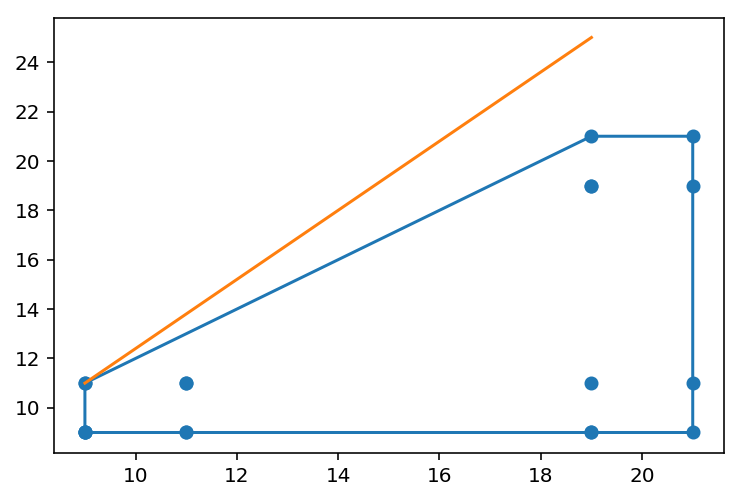

In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"
%matplotlib inline

import math
from shapely.geometry import Polygon, Point, LineString



p1 = Polygon([(-1,1),(1,-1),(1,1),(-1,1)])
p2 = Polygon([(2,2),(3,2),(3,3)])
newp = p1.union(p2)

class MyPolygon(Polygon):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def __add__(self, other):
        # minkowsky sum of two polygons
        newp = []
        for p1 in self.exterior.coords:
            for p2 in other.exterior.coords:
                x1,y1 = p1
                x2,y2 = p2
                newp.append((x1+x2, y1+y2))
        
        return MyPolygon(newp)
    
    def rotate(self, theta):
        newp = []
        for p in self.exterior.coords:
            x1, y1 = p
            newp.append((math.cos(theta)*x1 - math.sin(theta)*y1,
                math.sin(theta)*x1 + math.cos(theta)*y1))
        return MyPolygon(newp)
        
p1 = MyPolygon([(-1,-1),(1,-1),(1,1),(-1,1)])
p2 = MyPolygon([(10,10),(20,10),(20,20)])
p3 = p1.rotate(30/360*2*math.pi)
p12 = (p1+p2)
p32 = (p3+p2)

plt.scatter(*p12.exterior.coords.xy)


from shapely.ops import linemerge, polygonize_full

result, dangles, cuts, invalids = polygonize_full(p12.convex_hull.exterior)
print(result[0])
plt.plot(*result[0].exterior.coords.xy)
print(*result[0].exterior.coords.xy)

line = LineString([(19, 25), (9, 11)])
plt.plot(*line.coords.xy)
line.intersects(p12)

(9.0, 9.0) (9.0, 11.0) (19.0, 21.0) (21.0, 21.0) (21.0, 9.0) (9.0, 9.0)
(9.63397459621556, 8.63397459621556) (8.63397459621556, 10.36602540378444) (18.633974596215563, 20.366025403784437) (20.366025403784437, 21.366025403784437) (21.366025403784437, 19.633974596215563) (21.366025403784437, 9.63397459621556) (19.633974596215563, 8.63397459621556) (9.63397459621556, 8.63397459621556)


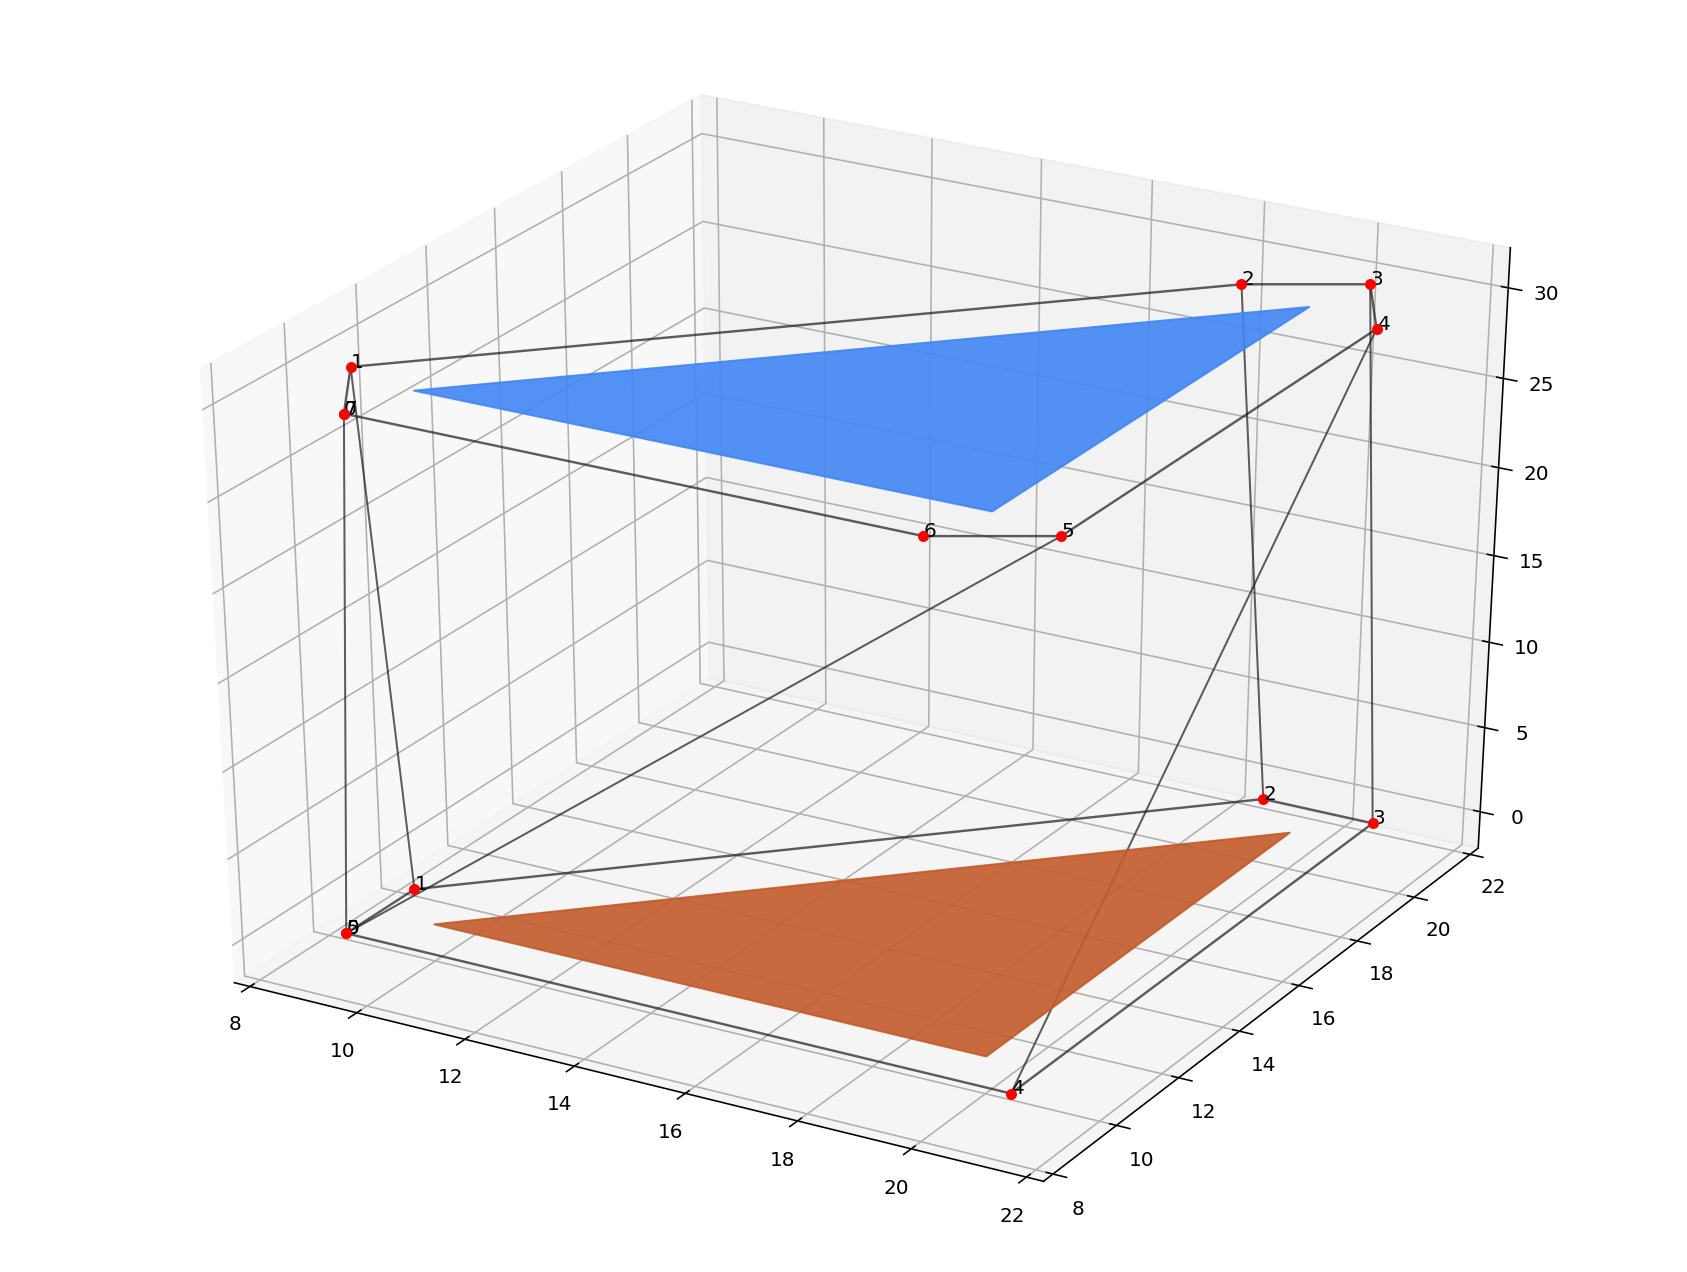

In [29]:
ax = Axes3D(plt.figure(figsize=(6.4*1.8, 4.8*1.8)))

########### 0 deg
i = 0
for x,y in p12.convex_hull.exterior.coords:
    ax.scatter(x,y,0, marker='o', color='r')
    ax.text(x, y, 0, str(i))
    i += 1
#poly3d.set_edgecolor('k')

ax.plot(*p12.convex_hull.exterior.coords.xy, zs=0, linewidth=1.2, c=colors.rgb2hex((0.1,0.1,0.1)), alpha=0.7)

poly3d = Poly3DCollection([[(x, y, 0) for x,y in p1.exterior.coords]], alpha=0.9)
poly3d.set_color(colors.rgb2hex((196/255, 91/255, 43/255)))
ax.add_collection3d(poly3d)
                 
poly3d = Poly3DCollection([[(x, y, 0) for x,y in p2.exterior.coords]], alpha=0.9)
poly3d.set_color(colors.rgb2hex((196/255, 91/255, 43/255)))
ax.add_collection3d(poly3d)

########## 30 deg
i = 0
for x,y in p32.convex_hull.exterior.coords:
    ax.scatter(x,y,30, marker='o', color='r')
    ax.text(x, y, 30, str(i))
    i += 1
#poly3d.set_edgecolor('k')

ax.plot(*p32.convex_hull.exterior.coords.xy, zs=30, linewidth=1.2, c=colors.rgb2hex((0.1,0.1,0.1)), alpha=0.7)

poly3d = Poly3DCollection([[(x, y, 30) for x,y in p3.exterior.coords]], alpha=0.9)
poly3d.set_color(colors.rgb2hex((66/255, 134/255, 243/255)))
ax.add_collection3d(poly3d)
                 
poly3d = Poly3DCollection([[(x, y, 30) for x,y in p2.exterior.coords]], alpha=0.9)
poly3d.set_color(colors.rgb2hex((66/255, 134/255, 244/255)))
ax.add_collection3d(poly3d)

############# connect polygons
if len(p12.convex_hull.exterior.coords) < len(p32.convex_hull.exterior.coords):
    v1 = p12.convex_hull.exterior.coords
    v2 = p32.convex_hull.exterior.coords
else:
    v2 = p12.convex_hull.exterior.coords
    v1 = p32.convex_hull.exterior.coords
    
print(*v1)
print(*v2)
for i,lower in enumerate(v1):
    x1, y1 = v1[i]
    x2, y2 = v2[i]

    ax.plot([x1, x2], [y1, y2], [0,30], linewidth=1, c=colors.rgb2hex((0.1,0.1,0.1)), alpha=0.7)


# ax.set_xlim3d(0,25)
# ax.set_ylim3d(0,25)
# ax.set_zlim3d(0,40)

0.0 461
1.0471975511965976 1150
2.0943951023931953 1450
3.141592653589793 709


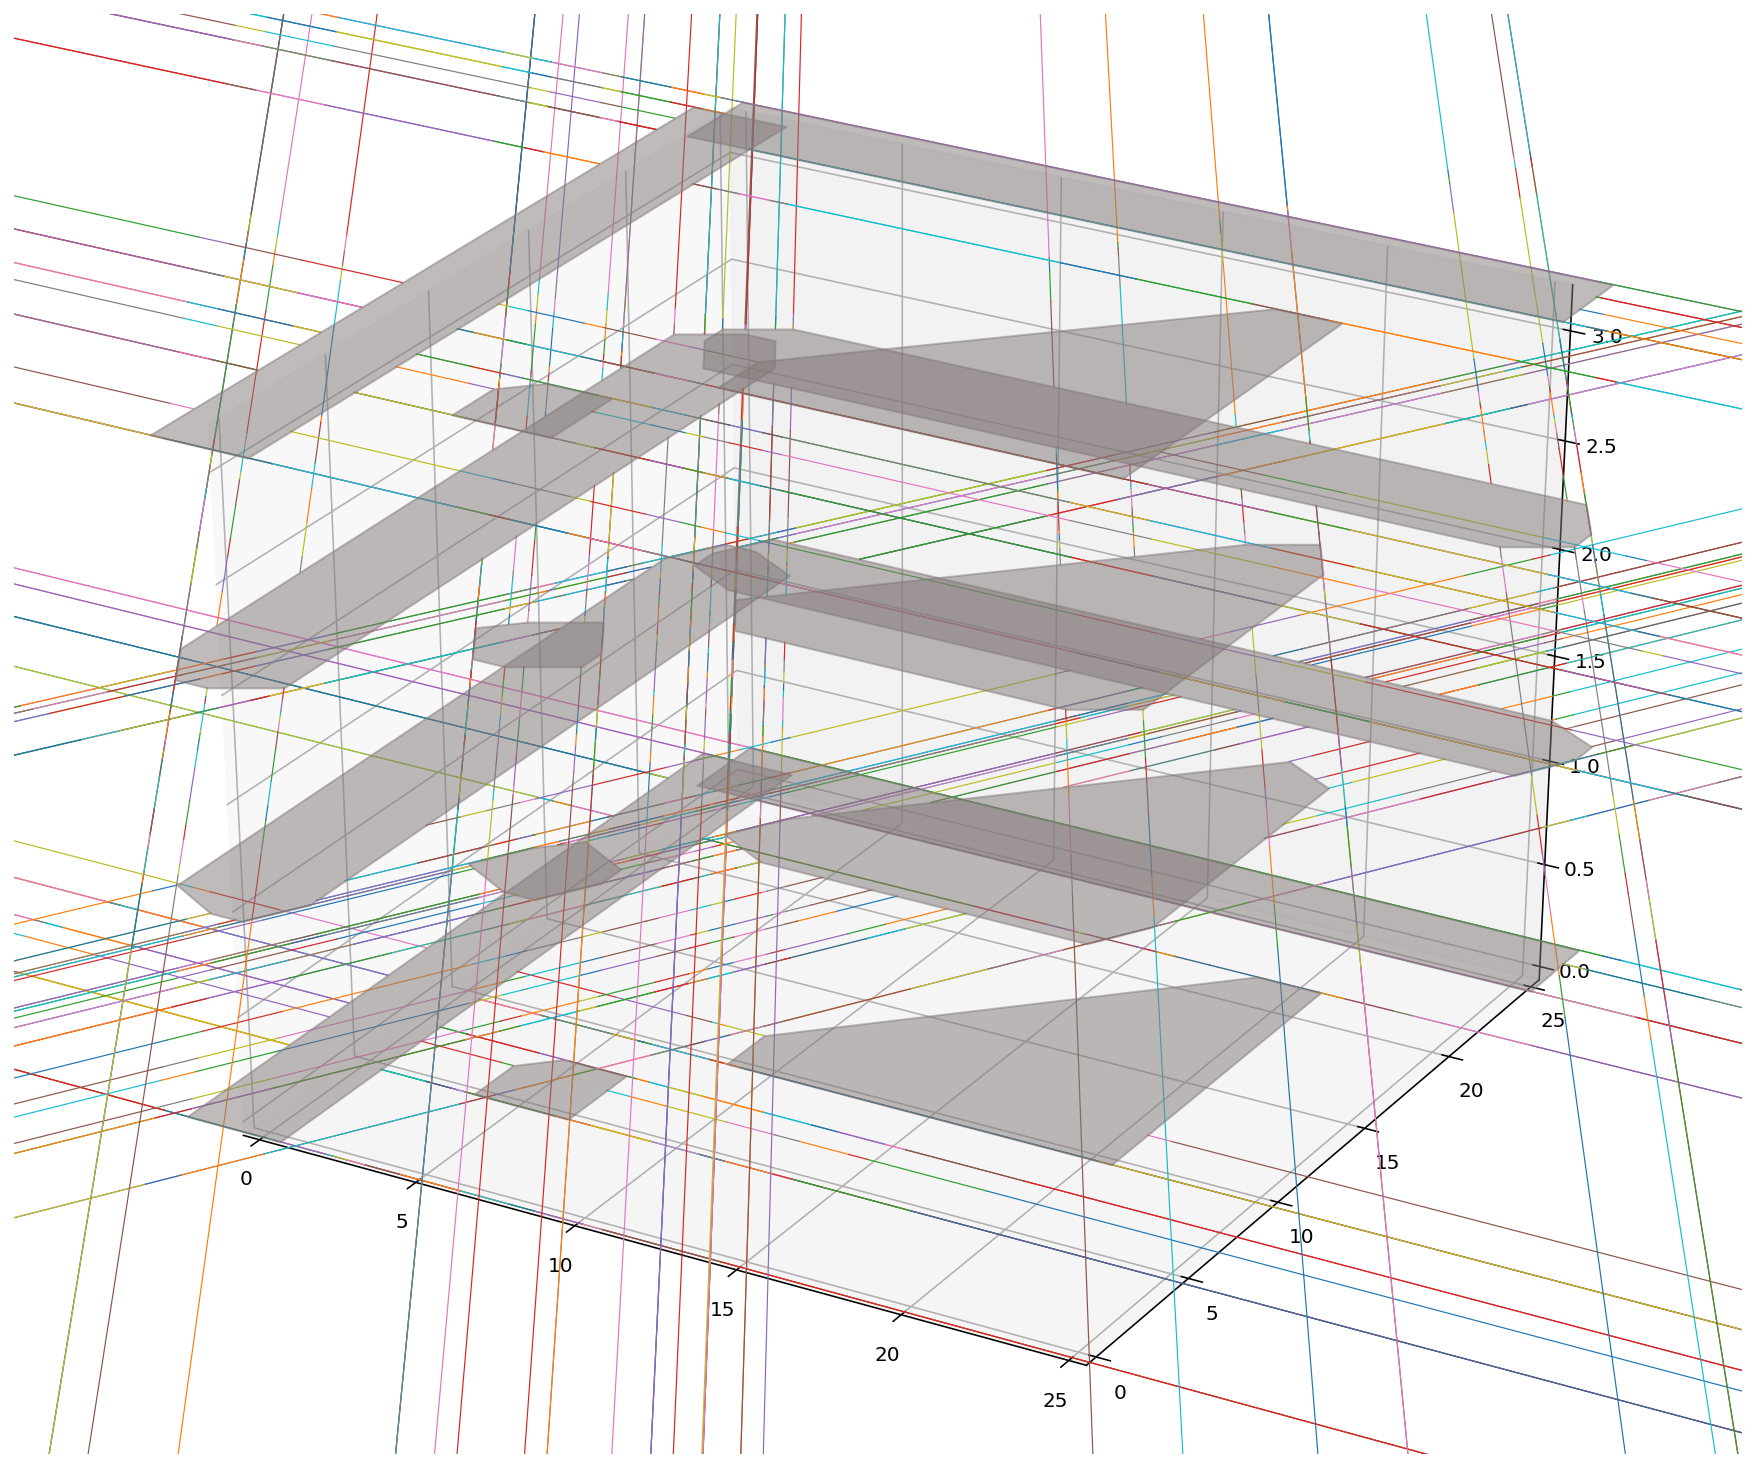

In [77]:
   
import numpy as np
from collections import OrderedDict
from shapely.geometry import Point, Polygon, LineString
from shapely.ops import unary_union

HYPOTENUSE = 100 # DIRTY: sollte groß sein 
INC = 4
robot = MyPolygon([(-1,-1),(1,-1),(1,1),(-1,1)])
obstacle1 = MyPolygon([(10,10),(20,10),(20,20)])
obstacle2 = MyPolygon([(5,5),(6,5),(6,6)])
wall1 = MyPolygon([(0,25),(25,25),(25,26), (0,26)])
wall2 = MyPolygon([(0,0),(0,25),(-1,25), (-1,0)])
obstacles = [obstacle1, obstacle2, wall1, wall2]

ax = Axes3D(plt.figure(figsize=(12, 10)))

graph = []
cspaces = OrderedDict()
lines = OrderedDict()

under_lines = None
old_theta = 0


angles = np.linspace(0,np.pi, INC)

for theta in angles:
    if theta not in cspaces.keys():
        cspaces.update({theta: []})
        
    if theta not in lines.keys():
        lines.update({theta: []})
        
    for obstacle in obstacles:
        cspace = (robot.rotate(theta)+obstacle).convex_hull
        cspaces[theta].append(cspace)
        
for theta in angles:
    # Line Collection
    for cspace in cspaces[theta]:

        poly3d = Poly3DCollection([[(x, y, theta) for x,y in cspace.exterior.coords]], alpha=0.5)
        poly3d.set_color(colors.rgb2hex((130/255, 120/255, 120/255)))
        ax.add_collection3d(poly3d)


        #### Add helper lines 
    #     x2 = None
    #     y2 = None
    #     for x1, y1 in cspace.exterior.coords:
    #         if x2 and y2:
    #             try:
    #                 alpha = np.arctan((y2-y1)/(x2-x1))
    #             except ZeroDivisionError:
    #                 alpha = np.pi/2
    #             x1n = x1 + HYPOTENUSE*np.cos(alpha)
    #             y1n = y1 + HYPOTENUSE*np.sin(alpha)
    #             x2n = x2 - HYPOTENUSE*np.cos(alpha)
    #             y2n = y2 - HYPOTENUSE*np.sin(alpha)


    #             line = LineString([(x1n,y1n), (x2n,y2n)])
    #             help_lines.append(line)
    #         x2 = x1
    #         y2 = y1

        #### Add directional lines to the line collection
        for vertex in cspace.exterior.coords:
            x0, y0 = vertex

            x1 = x0 + HYPOTENUSE*np.cos(theta)
            y1 = y0 + HYPOTENUSE*np.sin(theta)
            x2 = x0 - HYPOTENUSE*np.cos(theta)
            y2 = y0 - HYPOTENUSE*np.sin(theta)

            line = LineString([(x1,y1), (x2,y2)])

#             result = False
#             for lt in lines:
#                 result = result or lt.crosses(line.buffer(0.1))
#                 #result = False
#             if not result:
            fragments = [line]
    
            for cspace_check in cspaces[theta]:
                fragments_temp = []
                for cline in fragments:
                    fragment = cline.difference(cspace_check.buffer(-0.001)) # HACK
                    try:
                        fragments_temp.extend(fragment)
                    except TypeError:
                        fragments_temp.append(fragment)
                fragments = fragments_temp
                       
            lines[theta].extend(fragments) 
            ### add to graph
        

old_theta = None
for theta in angles:
    if old_theta != None:
        current = lines[theta]
        under = lines[old_theta]
#         tempc = current # hard copy
#         tempu = under
        for i,u in enumerate(under):
            for j,c in enumerate(current):
                
                #print(u, c)
                pint = u.intersection(c)
                
                cs, ce = c.coords
                if Point(cs) == pint or Point(ce) == pint:
                    continue
                
                if pint.is_empty:
                    continue
                
                # split upper
                #fragments = split(c, pint)
                ps, pe = c.coords
                try:
                    fragments = [LineString([ps, pint]), LineString([pe, pint])]
                except:
                    pass
                current.pop(j)
                current[j:j] = fragments

        for j,c in enumerate(current):

            for i,u in enumerate(under):
                pint = u.intersection(c)
                
                us, ue = u.coords
                if Point(us) == pint or Point(ue) == pint:
                    continue
                if pint.is_empty:
                    continue
                    
                # split under
                #print("SPLIT", u, pint)
                #fragments = split(u, pint)
                ps, pe = u.coords
                try:
                    fragments = [LineString([ps, pint]), LineString([pe, pint])]
                except:
                    pass
                #print("APPEND", fragments)
                under.pop(i)
                under[i:i] = fragments
        
    old_theta = theta
    
for theta in angles:
    print(theta, len(lines[theta]))
    for i, line in enumerate(lines[theta]):
        #print(i, line)
        ax.plot(*line.coords.xy, zs=theta, linewidth=0.6)
    

#     if under_lines:
#         for under in under_lines:
#             old_pint = None
#             for line in lines[theta]:

#                 pint = line.intersection(under)
#                 if pint.is_empty:
#                     old_pint = None
#                     continue
                    
#                 if old_pint:
#                     ax.plot(*LineString([old_pint, pint]).coords.xy, zs=old_theta, color='k', linewidth=1)
                
#                 ax.scatter(*pint.coords.xy, theta, marker='x', color='r')
#                 ax.scatter(*pint.coords.xy, old_theta, marker='x', color='r')
#                 ax.plot(*zip(*[pint.coords[0]]*2), [old_theta, theta], color='b')
                
#                 old_pint = pint
                

#     under_lines = lines
#     old_theta = theta

a = ax.set_xlim3d(0,25)
b = ax.set_ylim3d(0,25)
c = ax.set_zlim3d(0,math.pi)

plt.savefig('3d_cspace1.svg', format='svg', bbox_inches='tight')

In [34]:
l = LineString([(221.0, 9.0), (20.72654252800535,9.0)]) 
p = Point(20.72654252800536, 9)

l2 = LineString([(1, 10), (18, 10)]) 
p2 = Point(5, 10)

s = split(l2, p2)
print(s)

GEOMETRYCOLLECTION (LINESTRING (1 10, 5 10), LINESTRING (5 10, 18 10))


In [8]:
class Vertex:
    def __init__(self, x, y, theta):
        self.x = float(x)
        self.y = float(y)
        self.theta = float(theta)
        
#         if neighbors:
#             self.neighbors = neighbors
#         else:
#             self.neighbors = []
            
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.theta == other.theta
    
    def __hash__(self):
        #return hash(self.__dict__.values())
        return hash((self.x, self.y, self.theta))
            
            
    def __repr__(self):
        return "{} {} {}".format(self.x, self.y, self.theta)
    
    def weight(self, other):
        return ((self.x - other.x) ** 2 + (self.y - other.y) ** 2) ** 0.5
    

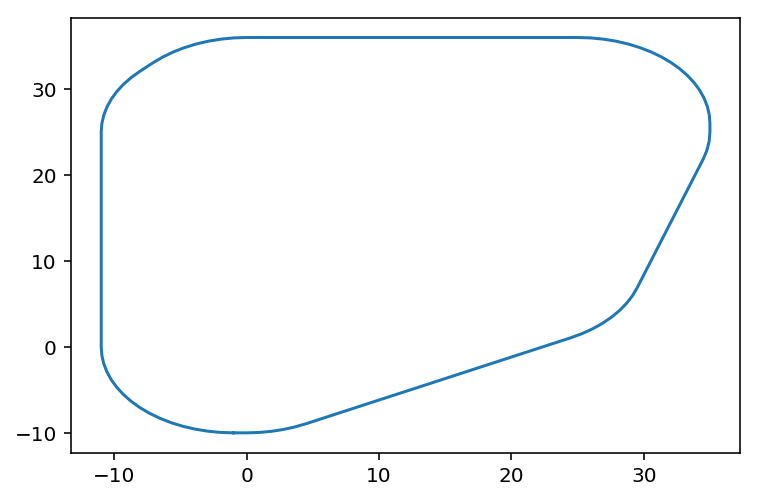

evaluate angles: [0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 0.        ] 40.0
Time elapsed: 0.37138867378234863 [s], lines finished
Time elapsed: 1.1202526092529297 [s], under finished
Time elapsed: 2.440316915512085 [s], current finished
Time elapsed: 8.15084981918335 [s], under finished
Time elapsed: 10.955816984176636 [s], current finished
Time elapsed: 20.865445137023926 [s], under finished
Time elapsed: 24.666330099105835 [s], current finished
Time elapsed: 36.741286277770996 [s], under finished
Time elapsed: 41.465322971343994 [s], current finished
Time elapsed: 53.29524850845337 [s], under finished
Time elapsed: 57.92475485801697 [s], current finished


Exception ignored in: <bound method BaseGeometry.__del__ of <shapely.geometry.point.Point object at 0x7fe7f092f0f0>>
Traceback (most recent call last):
  File "/home/marc/.jupyter-venv/lib/python3.6/site-packages/shapely/geometry/base.py", line 234, in __del__
    self.empty(val=None)
  File "/home/marc/.jupyter-venv/lib/python3.6/site-packages/shapely/geometry/base.py", line 227, in empty
    self._lgeos.GEOSGeom_destroy(self.__geom__)
KeyboardInterrupt: 


Time elapsed: 70.11407351493835 [s], under finished
Time elapsed: 74.738361120224 [s], current finished
Time elapsed: 85.95357394218445 [s], under finished


KeyboardInterrupt: 

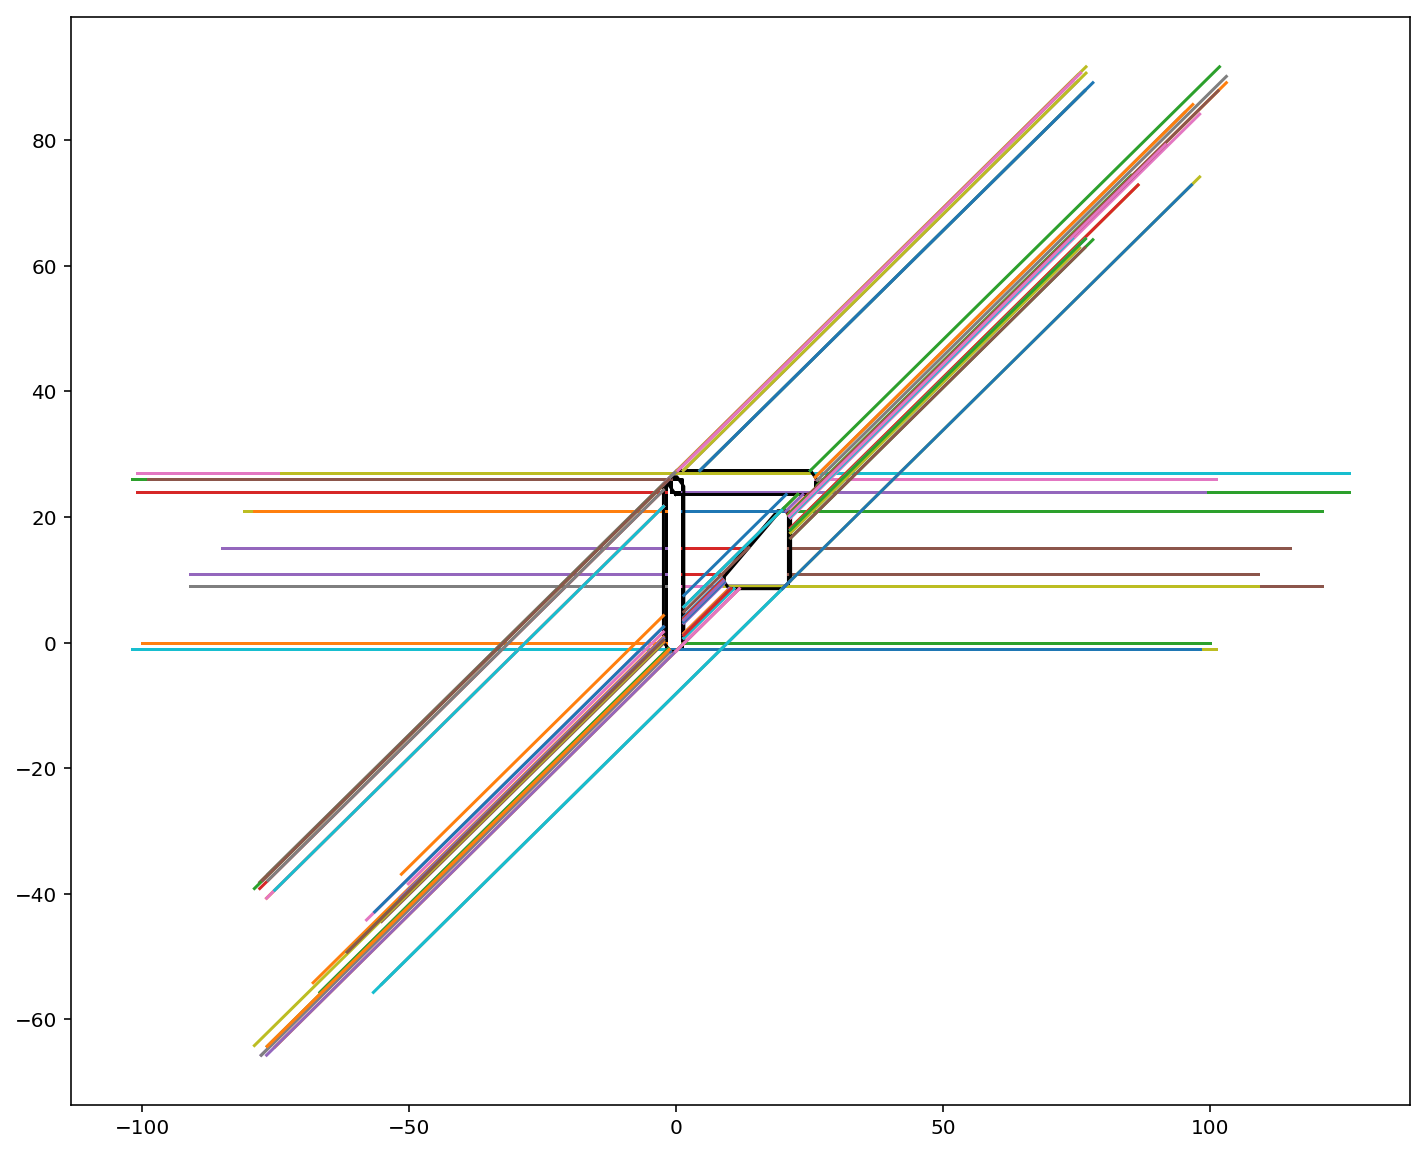

In [34]:
import numpy as np
import networkx as nx
import time
from collections import OrderedDict
from shapely.geometry import Point, Polygon, LineString, MultiPolygon
from shapely.ops import unary_union

HYPOTENUSE = 100 # DIRTY: sollte groß sein 
INC = 10
robot = MyPolygon([(-1,-1),(1,-1),(1,1),(-1,1)])
obstacle1 = MyPolygon([(10,10),(20,10),(20,20)])
obstacle2 = MyPolygon([(5,5),(6,5),(6,6)])
wall1 = MyPolygon([(0,25),(25,25),(25,26), (0,26)])
wall2 = MyPolygon([(0,0),(0,25),(-1,25), (-1,0)])
obstacles = [obstacle1, wall1, wall2]
obstacles_poly = MultiPolygon(obstacles)
plt.plot(*obstacles_poly.convex_hull.buffer(10).exterior.coords.xy)
plt.show()
#ax = Axes3D(plt.figure(figsize=(12, 10)))

graph = nx.Graph()
# cspaces = OrderedDict()
# lines = OrderedDict()
# vertical = OrderedDict()


start = (0,0)
dest = (15,15)

angles = np.linspace(0,2*np.pi, INC)
angles = np.append(angles[:-1], [0])

print("evaluate angles:", angles, angles[1]/2/math.pi*360)
timestart = time.time()


cspaces = [[] for _ in range(len(angles))]
lines = [[] for _ in range(len(angles))]
vertical = [[] for _ in range(len(angles))]

for theta_idx, theta in enumerate(angles):
#     if theta not in cspaces.keys():
#         cspaces.update({theta: []})
        
#     if theta not in lines.keys():
#         lines.update({theta: []})
        
#     if theta not in vertical.keys():
#         vertical.update({theta: []})
        
    for obstacle in obstacles:
        cspace = (robot.rotate(theta)+obstacle).convex_hull
        cspaces[theta_idx].append(cspace)
        
for theta_idx, theta in enumerate(angles):
    # Line Collection
    for cspace in cspaces[theta_idx]:

#         poly3d = Poly3DCollection([[(x, y, theta) for x,y in cspace.exterior.coords]], alpha=0.5)
#         poly3d.set_color(colors.rgb2hex((130/255, 120/255, 110/255)))
#         ax.add_collection3d(poly3d)

        #### Add directional lines to the line collection
        for vertex in list(cspace.exterior.coords) + [start, dest]:
            x0, y0 = vertex

            x1 = x0 + HYPOTENUSE*np.cos(theta)
            y1 = y0 + HYPOTENUSE*np.sin(theta)
            x2 = x0 - HYPOTENUSE*np.cos(theta)
            y2 = y0 - HYPOTENUSE*np.sin(theta)

            line1 = LineString([(x0,y0), (x2,y2)])
            line2 = LineString([(x1,y1), (x0,y0)])
            fragments = [line1, line2]
    
            for cspace_check in cspaces[theta_idx]:
                fragments_temp = []
                for cline in fragments:
                    fragment = cline.difference(cspace_check.buffer(-0.001)) # HACK
                    #fragment = cline.difference(cspace_check)
                    try:
                        fragments_temp.extend(fragment)
                    except TypeError:
                        fragments_temp.append(fragment)
                fragments = fragments_temp
                       
            lines[theta_idx].extend(fragments)
plt.figure(figsize=(12, 10))
for cspace in cspaces[0]:
    plt.plot(*cspace.exterior.coords.xy, color='k')
            
for line in lines[0]:
    plt.plot(*line.coords.xy)
    
    
for cspace in cspaces[1]:
    plt.plot(*cspace.exterior.coords.xy, color='k')
            
for line in lines[1]:
    plt.plot(*line.coords.xy)
            
print("Time elapsed: {} [s], lines finished".format(time.time()-timestart))         
old_theta = None
old_theta_idx = None
for theta_idx, theta in enumerate(angles):
    if old_theta != None:
        current = lines[theta_idx]
        under = lines[old_theta_idx]
        current_temp = current[:]
        for i,u in enumerate(under):
            for j,c in enumerate(current):
                if u.length < 0.0001 or c.length < 0.0001:
                    continue
                
                pint = u.intersection(c)

                cs, ce = c.coords
    
                if Point(cs) == pint or Point(ce) == pint:
                    continue
                
                if pint.is_empty or isinstance(pint, LineString):
                    continue
                
                vertical[old_theta_idx].append(pint)
                
                # split upper
                #fragments = split(c, pint)
                #ps, pe = c.coords
                fragments = [LineString([cs, pint]), LineString([ce, pint])]

                current.pop(j)
                current[j:j] = fragments
                
                
        print("Time elapsed: {} [s], under finished".format(time.time()-timestart))  

        for j,c in enumerate(current_temp):

            for i,u in enumerate(under):
                if u.length < 0.0001 or c.length < 0.0001:
                    continue
                    
                pint = u.intersection(c)
                us, ue = u.coords
                if Point(us) == pint or Point(ue) == pint or us == ue:
                    continue
                if pint.is_empty or isinstance(pint, LineString):
                    continue
                    
                # split under
                #print("SPLIT", u, pint)
                #fragments = split(u, pint)
                #ps, pe = u.coords
                #print(ps, pint, pe)
                fragments = [LineString([us, pint]), LineString([ue, pint])]
                under.pop(i)
                under[i:i] = fragments
        print("Time elapsed: {} [s], current finished".format(time.time()-timestart)) 
        
    old_theta = theta
    old_theta_idx = theta_idx
    
print("Time elapsed: {} [s], fragments finished".format(time.time()-timestart))  
    
for theta_idx, theta in enumerate(angles):
    for i,u in enumerate(lines[theta_idx]):
        # add horizontal edges
        (x1, x2), (y1, y2) = u.coords.xy
        v1 = Vertex(x1, y1, theta)
        v2 = Vertex(x2, y2, theta)
        graph.add_edge(v1, v2, attr_dict={'weight': v1.weight(v2)})
#         ax.plot([x1, x2], [y1, y2], zs=theta)
        
    for p in vertical[theta_idx]:
        # add vertial edges
        (x1,), (y1, ) = p.coords.xy
        v1 = Vertex(x1, y1, angles[theta_idx])
        v2 = Vertex(x1, y1, angles[theta_idx+1])
        graph.add_edge(v1, v2, attr_dict={'weight': v1.weight(v2)})
#         ax.scatter(*p.coords.xy, angles[iii],marker='x', color='r')
#         ax.scatter(*p.coords.xy, angles[iii+1],marker='x', color='r')
#         ax.plot(*zip(*[p.coords[0]]*2), [angles[iii],angles[iii+1]])

            
# for theta in angles:
#     print(theta, len(lines[theta]))
#     for i, line in enumerate(lines[theta]):
#         #print(i, line)
#         ax.plot(*line.coords.xy, zs=theta, linewidth=0.6)
#print(graph.edges())
        
print("Time elapsed: {} [s], all finished".format(time.time()-timestart))  
a = ax.set_xlim3d(0,25)
b = ax.set_ylim3d(0,25)
c = ax.set_zlim3d(0,7)

In [473]:
l1 = LineString([(9.001414213562374, 11), (9, 11)]) 
l2 = LineString([(9, 11), (9, 11)])

print(l1.coords[1], l1.coords[1], l2.coords[0], l2.coords[1])
print(l1.coords[0] == l1.coords[1] or (l2.coords[0] == l2.coords[1]))

lres= l1.intersection(l2)

print(lres)



l1 = LineString([(99, 27), (-1, 27)])
l2 = LineString([(-0.9999999999999998, 27), (-1, 27)])
print(l1.coords.xy == l2.coords.xy)

lres= l1.intersection(l2)

print(lres)

u = LineString([(30.0, 20.0), (21.0, 20.0)])
c = LineString([ (21.0, 20.0), (30.0, 20.0)])

print(u, c)
pint = u.intersection(c)
cs, ce = c.coords

print("####")
if isinstance(pint, LineString):
    for p in pint.coords:
        x, y = p
        fragments = [LineString([cs, (x,y)]), LineString([ce, (x,y)])]
        print(*fragments)
        
angles[1]/2 /math.pi *360

(9.0, 11.0) (9.0, 11.0) (9.0, 11.0) (9.0, 11.0)
True
POINT (9 11)
False
LINESTRING (-0.9999999999999998 27, -1 27)
LINESTRING (30 20, 21 20) LINESTRING (21 20, 30 20)
####
LINESTRING (21 20, 30 20) LINESTRING (30 20, 30 20)
LINESTRING (21 20, 21 20) LINESTRING (30 20, 21 20)


40.0

In [ ]:
ax = Axes3D(plt.figure(figsize=(14, 11)))

#print(hash(Vertex(5.0, 10.0, 0.0)))



for edge in graph.edges():
    v1, v2 = edge
    
    #print("{} -> {}, {} -> {}".format(v1, hash(v1), v2, hash(v2)))
    
    ax.plot([v1.x, v2.x],[v1.y, v2.y],[v1.theta, v2.theta], linewidth=1, color='k')

closest_index = np.abs(angles-6.1).argmin()
path = nx.astar_path(graph, Vertex(0.0, 0.0, 0.0), Vertex(15.0, 15.0, angles[closest_index]), weight='weight')

print(path)
start = None
for p in path:
    if isinstance(start, Vertex):

        ax.plot([start.x, p.x],[start.y, p.y],[start.theta, p.theta], linewidth=2, color='r')

    start = p
    
ax.view_init(90, 0)

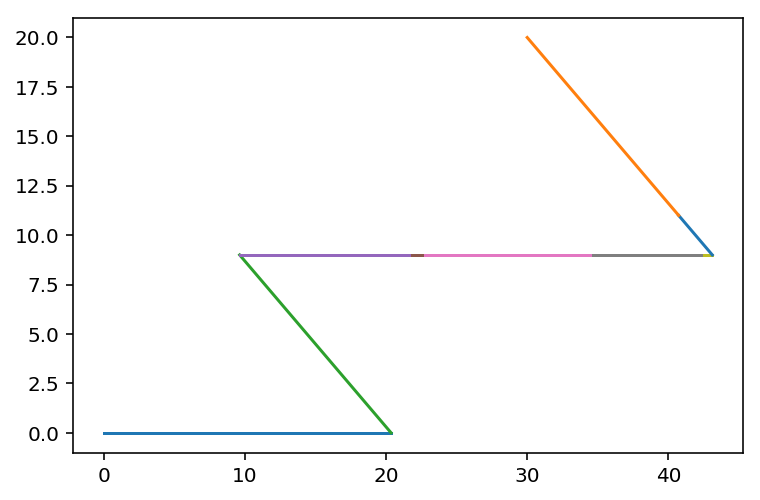

In [504]:
p_old = None
for p in path:
    if isinstance(p_old, Vertex):
        plt.plot([p_old.x, p.x], [p_old.y, p.y])
        
    p_old = p

0
1
2
3


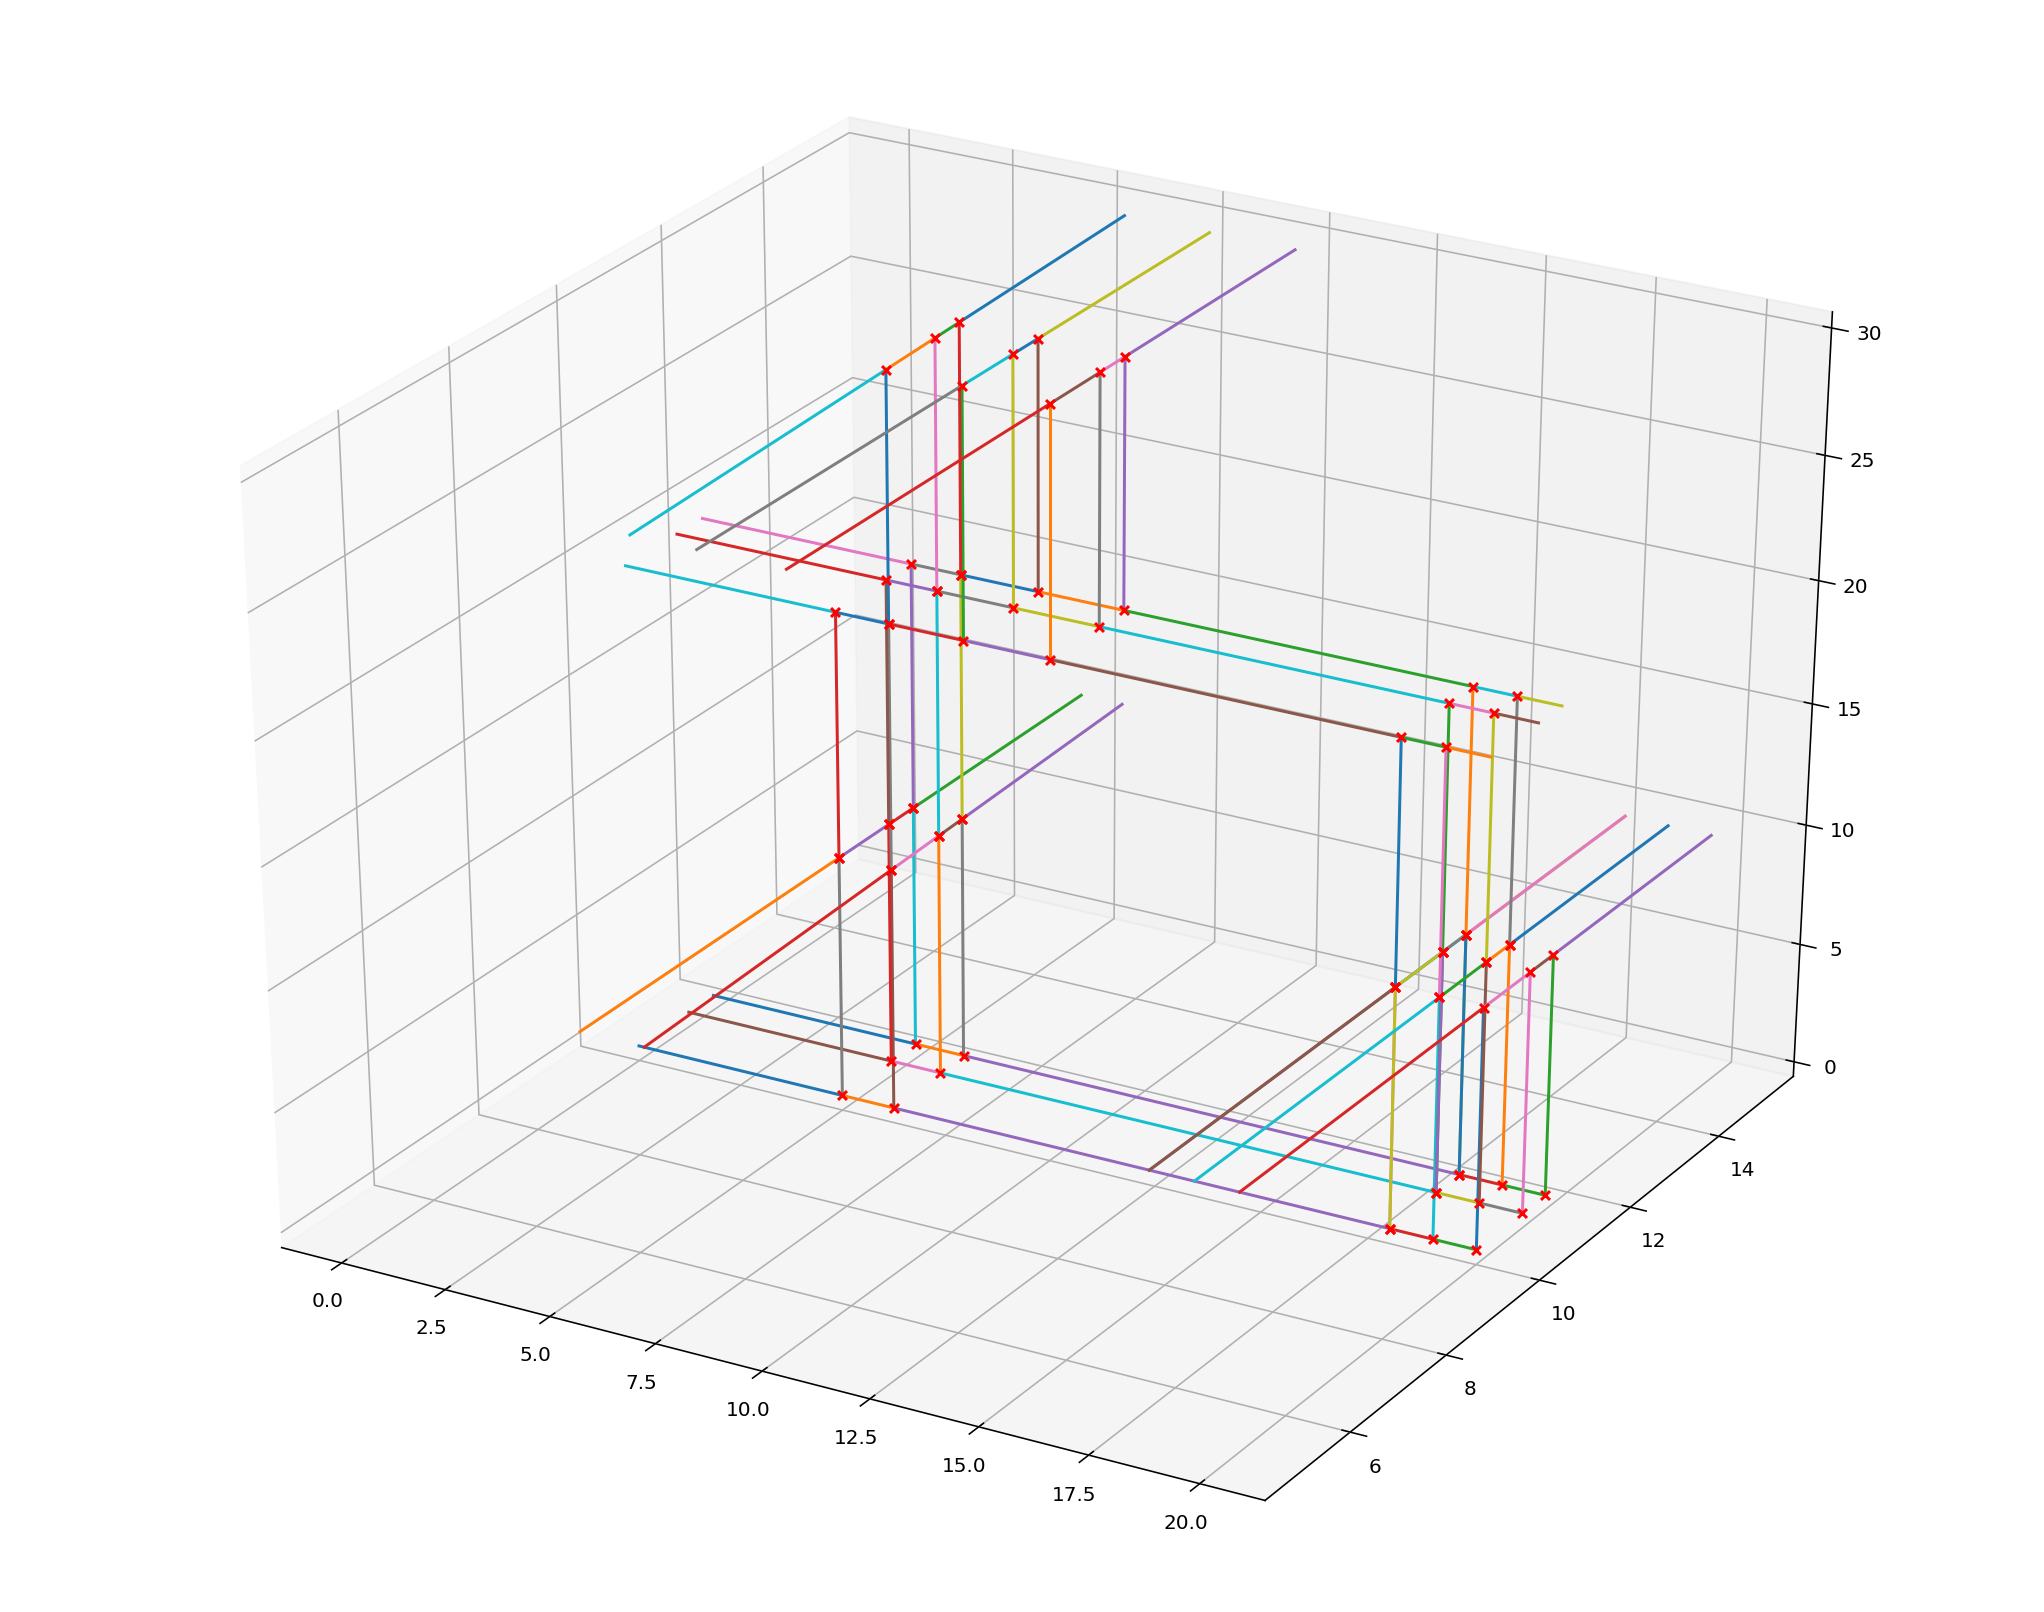

In [93]:
from collections import OrderedDict
import networkx as nx
from shapely.ops import split
from pprint import pprint

ax = Axes3D(plt.figure(figsize=(14, 11)))

graph = nx.Graph()


underx = [LineString([(0,10),(20,10)]), LineString([(0,11),(20,11)]), LineString([(0,11.5),(20,11.5)])]
currentx = [LineString([(6.5,5),(6,15)]), LineString([(18,5),(18,15)]), LineString([(5,5),(5,15)]), LineString([(18,5),(18,15)]),
           LineString([(19,5),(19,15)]),LineString([(20,5),(20,15)])]
upperx = [LineString([(0,10),(20,10)]), LineString([(0,11.5),(20,11.5)]), LineString([(0,11),(20,11)])]
upperx2 = [LineString([(6.5,5),(6,15)]),LineString([(10,5),(10,15)]),LineString([(8,5),(8,15)])]

cspace = OrderedDict({0: underx, 1: currentx, 2: upperx, 3: upperx2})
vertical = OrderedDict({0: [], 1: [], 2: [], 3: []})
sold = None
for s in cspace:
    if sold != None:
        
        current = cspace[s]
        under = cspace[sold]
#         tempc = current # hard copy
#         tempu = under
        for i,u in enumerate(under):
            for j,c in enumerate(current):
                pint = u.intersection(c)
                
                cs, ce = c.coords
                if Point(cs) == pint or Point(ce) == pint:
                    continue
                
                if pint.is_empty:
                    continue
                    
                vertical[sold].append(pint)
                
                # split upper
                #fragments = split(c, pint)
                ps, pe = c.coords
                fragments = [LineString([ps, pint]), LineString([pe, pint])]
                current.pop(j)
                current[j:j] = fragments

        for j,c in enumerate(current):

            for i,u in enumerate(under):
                pint = u.intersection(c)
                
                us, ue = u.coords
                if Point(us) == pint or Point(ue) == pint:
                    continue
                if pint.is_empty:
                    continue
                    
                # split under
                #print("SPLIT", u, pint)
                #fragments = split(u, pint)
                ps, pe = u.coords
                fragments = [LineString([ps, pint]), LineString([pe, pint])]
                #print("APPEND", fragments)
                under.pop(i)
                under[i:i] = fragments
    sold = s
    

#print(len(under))
#print(len(current))
for j,s in enumerate(cspace):
    print(j)
    for i,u in enumerate(cspace[s]):
        # add horizontal edges
        (x1, x2), (y1, y2) = u.coords.xy
        v1 = Vertex(x1, y1, j*100)
        v2 = Vertex(x2, y2, j*100)
        graph.add_edge(v1, v2, attr_dict={'weight': v1.weight(v2)})
        ax.plot([x1, x2], [y1, y2], zs=j*10)
        
    for p in vertical[s]:
        # add vertial edges
        (x1,), (y1, ) = p.coords.xy
        v1 = Vertex(x1, y1, j*100)
        v2 = Vertex(x1, y1, j*100+100)
        graph.add_edge(v1, v2, attr_dict={'weight': v1.weight(v2)})
        ax.scatter(*p.coords.xy, j*10,marker='x', color='r')
        ax.scatter(*p.coords.xy, j*10+10,marker='x', color='r')
        ax.plot(*zip(*[p.coords[0]]*2), [j*10,j*10+10])


    
c = ax.set_zlim3d(0,30)

len(graph.nodes())
plt.savefig('3d_cspace_lines.svg', format='svg')

[0.0 10.0 0.0, 5.0 10.0 0.0, 6.25 10.0 0.0, 6.25 10.0 100.0, 6.2 11.0 100.0, 6.175 11.5 100.0, 6.175 11.5 200.0, 8.0 11.5 200.0, 8.0 11.5 300.0, 8.0 15.0 300.0]


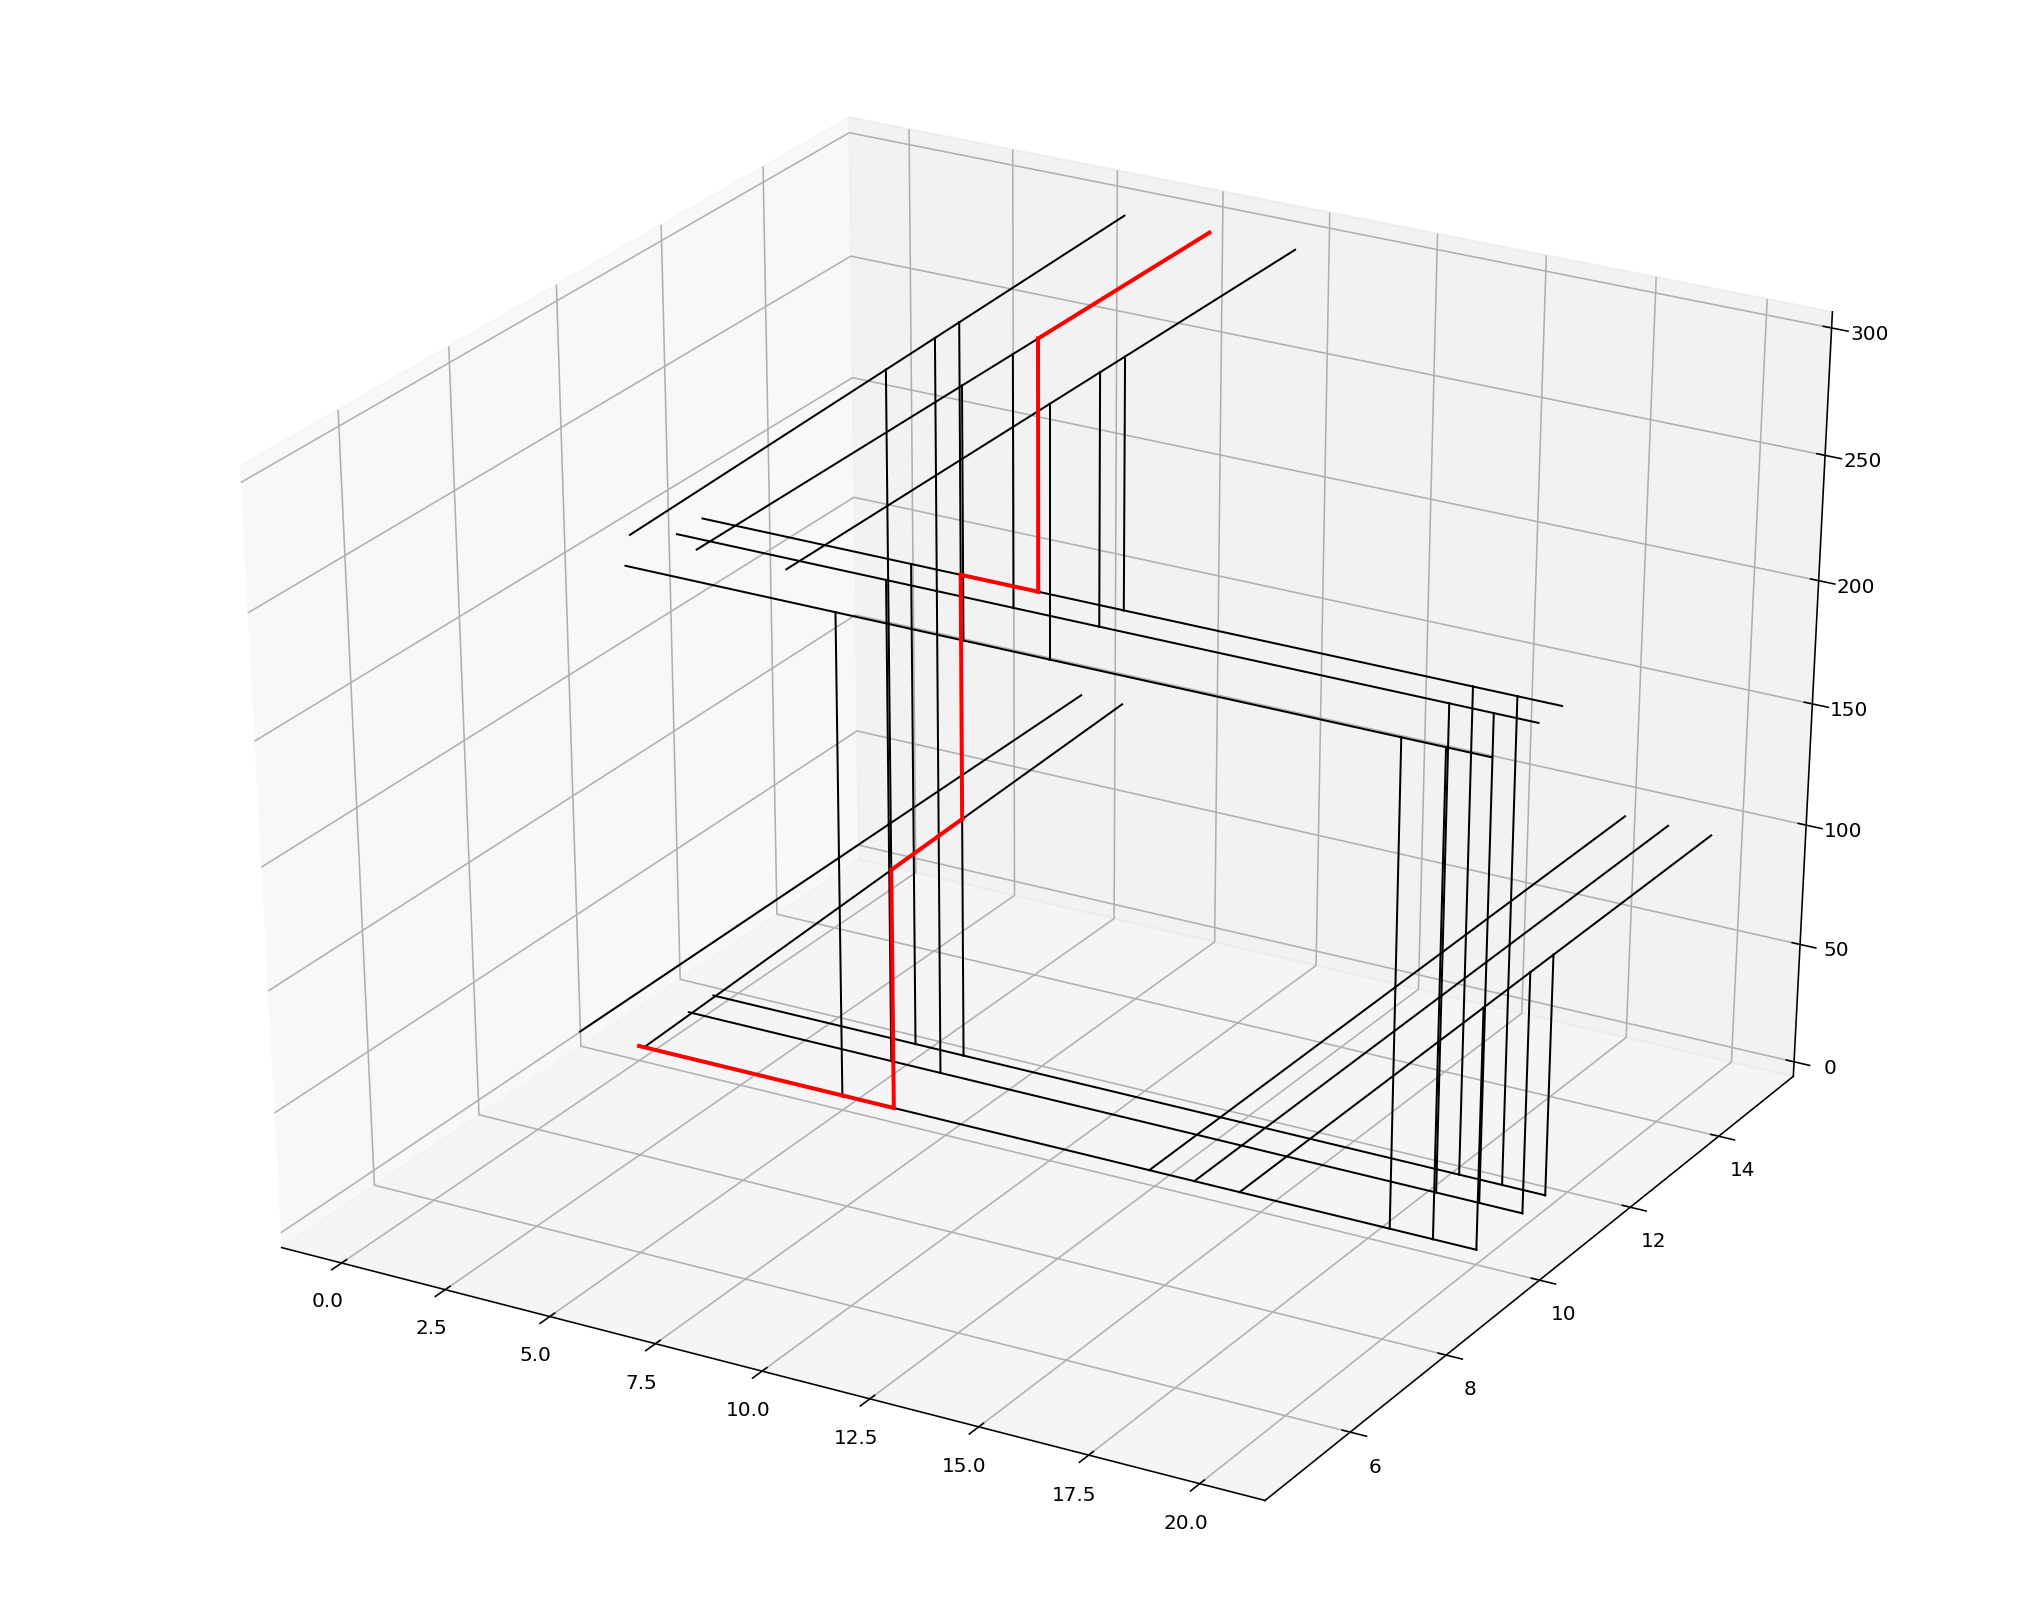

In [92]:
ax = Axes3D(plt.figure(figsize=(14, 11)))

#print(hash(Vertex(5.0, 10.0, 0.0)))

def heuristic(a,b):
    return True

for edge in graph.edges():
    v1, v2 = edge
    
    #print("{} -> {}, {} -> {}".format(v1, hash(v1), v2, hash(v2)))
    
    ax.plot([v1.x, v2.x],[v1.y, v2.y],[v1.theta, v2.theta], linewidth=1, color='k')
    
path = nx.astar_path(graph, Vertex(0.0, 10.0, 0.0), Vertex(8,15, 300), weight='weight')
print(path)
start = None
for p in path:
    if isinstance(start, Vertex):

        ax.plot([start.x, p.x],[start.y, p.y],[start.theta, p.theta], linewidth=2, color='r')
        
    start = p
plt.savefig('3d_cspace_graph.svg', format='svg')

16
15


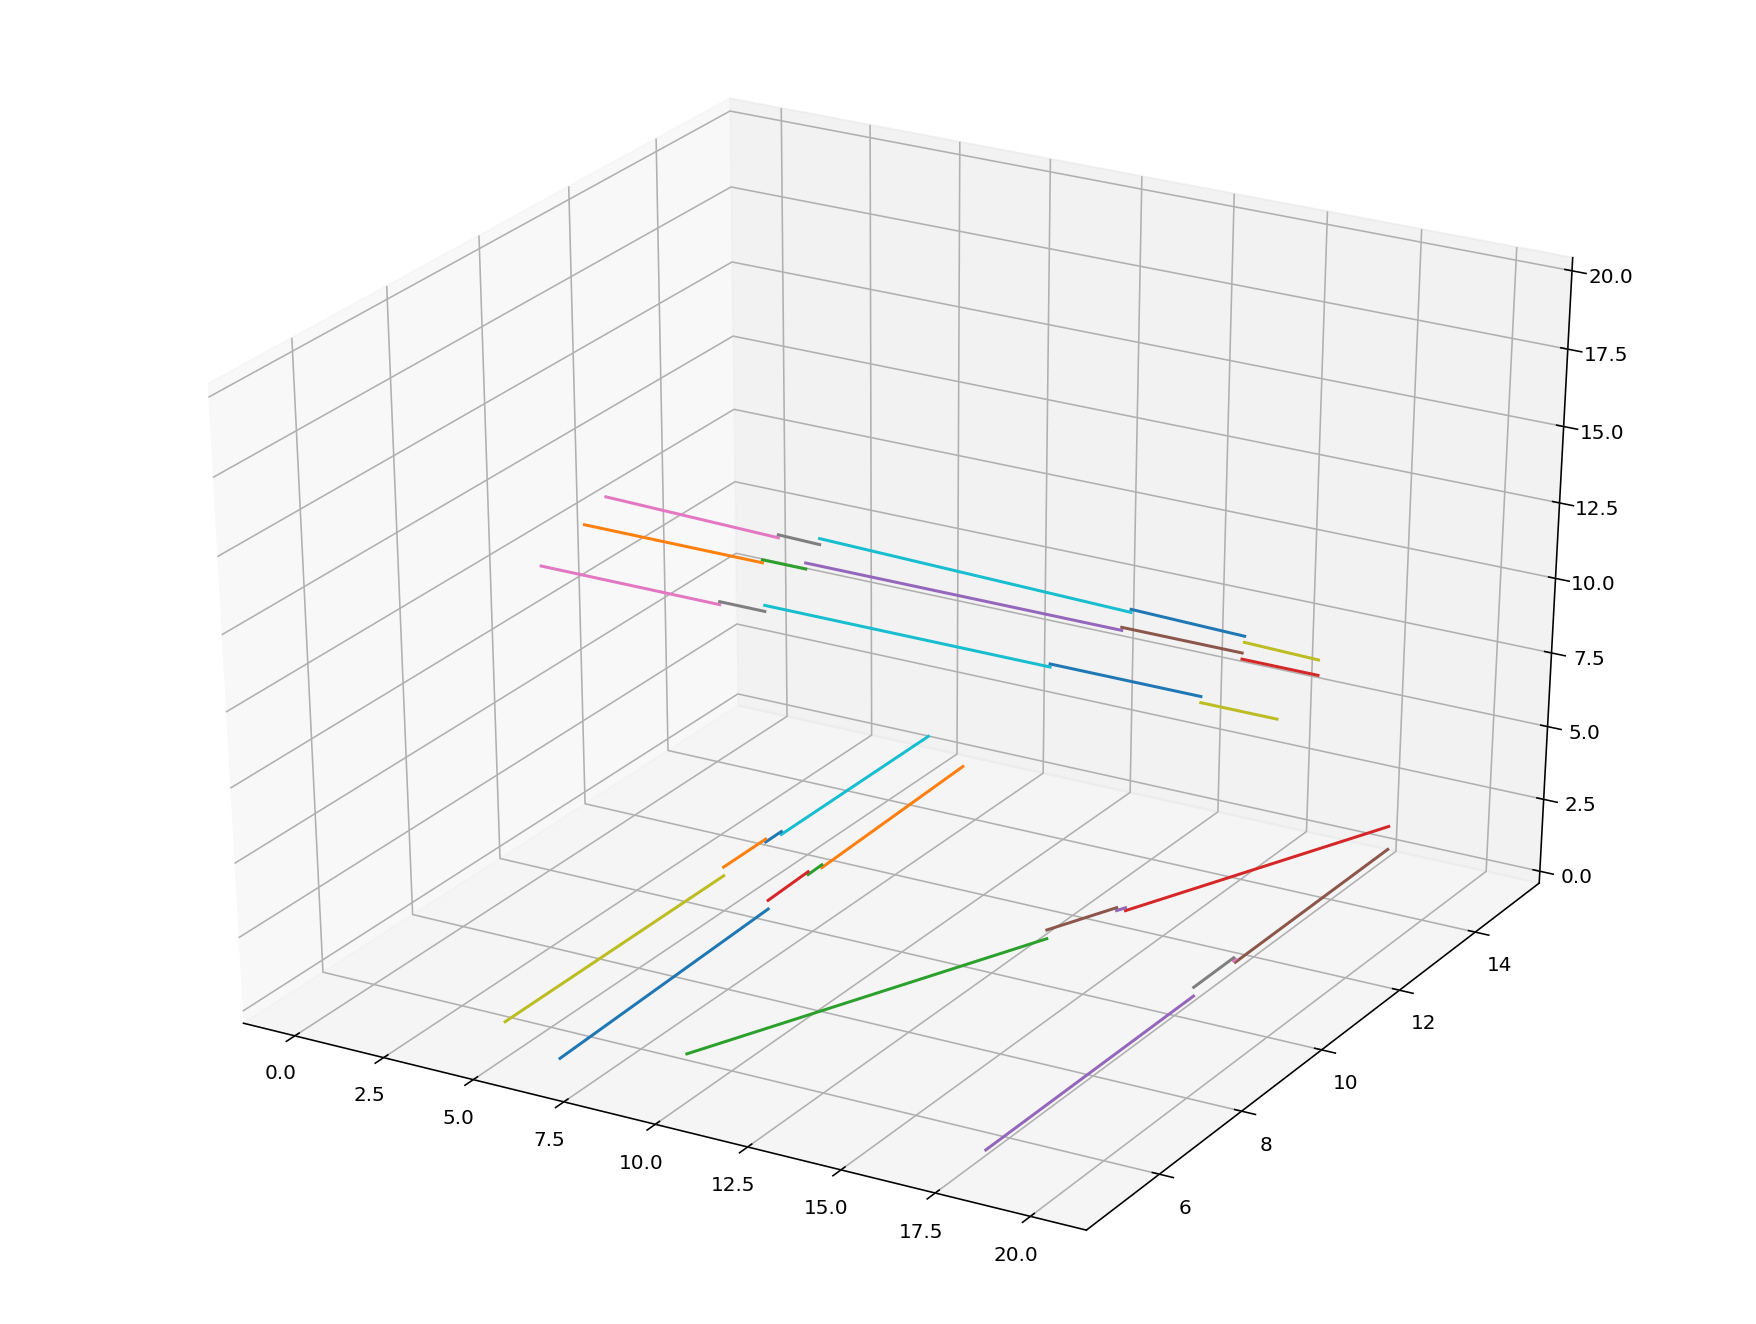

In [253]:
from collections import OrderedDict
import networkx as nx
from shapely.ops import split
from pprint import pprint

ax = Axes3D(plt.figure(figsize=(12, 9)))

graph = nx.Graph()

underx = [LineString([(0,10),(20,10)]), LineString([(0,11),(20,11)]), LineString([(0,11.5),(20,11)])]
currentx = [LineString([(6.5,5),(6,15)]), LineString([(18,5),(18,15)]), LineString([(5,5),(5,15)]), LineString([(10,5),(18,15)])]
upperx = [LineString([(0,10),(20,10)])]

cspace = OrderedDict({0: currentx, 1: underx})

sold = None
for s in cspace:
    if sold != None:
        
        current = cspace[s]
        under = cspace[sold]
#         tempc = current # hard copy
#         tempu = under
        for i,u in enumerate(under):
            for j,c in enumerate(current):
                pint = u.intersection(c)
                
                
                cs, ce = c.coords
                if Point(cs) == pint or Point(ce) == pint:
                    continue
                
                if pint.is_empty:
                    continue
                
                # split upper
                #fragments = split(c, pint)
                ps, pe = c.coords
                fragments = [LineString([ps, pint]), LineString([pe, pint])]
                current.pop(j)
                current[j:j] = fragments

        for j,c in enumerate(current):

            for i,u in enumerate(under):
                pint = u.intersection(c)
                
                us, ue = u.coords
                if Point(us) == pint or Point(ue) == pint:
                    continue
                if pint.is_empty:
                    continue
                    
                # split under
                #print("SPLIT", u, pint)
                #fragments = split(u, pint)
                ps, pe = u.coords
                fragments = [LineString([ps, pint]), LineString([pe, pint])]
                #print("APPEND", fragments)
                under.pop(i)
                under[i:i] = fragments
    sold = s
    
    
print(len(under))
print(len(current))
for j,s in enumerate(cspace):
    for i,u in enumerate(cspace[s]):
        ax.plot(*u.coords.xy, zs=j*10+i*0.1)
        
    


    
c = ax.set_zlim3d(0,20)

16
15
0 LINESTRING (6.5 5, 6.25 10)
1 LINESTRING (6 15, 6.182728410513142 11.34543178973717)
2 LINESTRING (6.2 11, 6.182728410513142 11.34543178973717)
3 LINESTRING (6.25 10, 6.2 11)
4 LINESTRING (18 5, 18 10)
5 LINESTRING (18 15, 18 11.05)
6 LINESTRING (18 11, 18 11.05)
7 LINESTRING (18 10, 18 11)
8 LINESTRING (5 5, 5 10)
9 LINESTRING (5 15, 5 11.375)
10 LINESTRING (5 11, 5 11.375)
11 LINESTRING (5 10, 5 11)
12 LINESTRING (10 5, 14 10)
13 LINESTRING (18 15, 14.90196078431373 11.12745098039216)
14 LINESTRING (14.8 11, 14.90196078431373 11.12745098039216)
15 LINESTRING (14 10, 14.8 11)


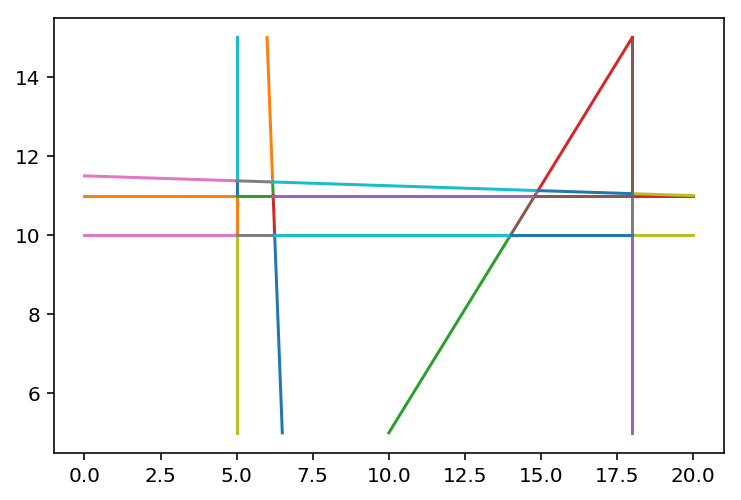

In [170]:
print(len(under))
print(len(current))

for i,u in enumerate(under):
    print(i,u)
    plt.plot(*u.coords.xy)
for i,c in enumerate(current):
    plt.plot(*c.coords.xy)

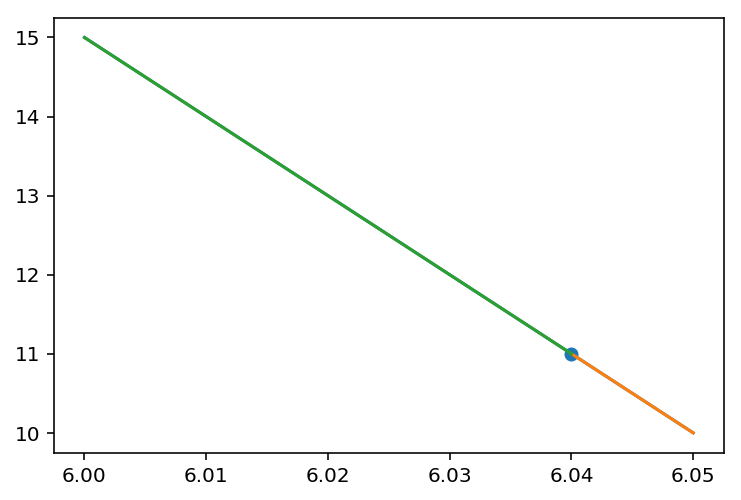

In [137]:
l1 = LineString([(6.05, 10), (6, 15)])
p1 = Point(6.04, 11)

plt.plot(*l1.coords.xy)
plt.scatter(*p1.coords.xy)

start, end = l1.coords
frag = [LineString([start, p1]), LineString([end, p1])]

for f in frag:
    plt.plot(*f.coords.xy)

In [235]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
points = np.random.rand(10, 2)
print(points)
hull = ConvexHull(points)

[[0.43569567 0.57986694]
 [0.31260651 0.87585227]
 [0.00379899 0.11541666]
 [0.32550098 0.30905552]
 [0.31333235 0.01759442]
 [0.74112672 0.33546306]
 [0.78259635 0.46550519]
 [0.85450785 0.77719976]
 [0.20403174 0.48080024]
 [0.81617193 0.63217165]]


In [791]:
np.append(np.linspace(0, np.pi/2, INC), 0)

array([0.        , 0.78539816, 1.57079633, 0.        ])

In [373]:
point = Point((1,0))
list(point.coords.xy)

[array('d', [1.0]), array('d', [0.0])]

In [380]:
p1 = MyPolygon([(-1,-1),(1,-1),(1,1),(-1,1)])
p2 = MyPolygon([(0,0),(1.5,-1),(2,2),(-1,1)])
print(list(str(p) for p in list(p1.exterior.intersection(p2.exterior))))
x,y = list([p.coords.xy for p in p1.exterior.intersection(p2.exterior)])
print(x,y)

['POINT (-1 1)', 'POINT (1 -0.6666666666666666)']
(array('d', [-1.0]), array('d', [1.0])) (array('d', [1.0]), array('d', [-0.6666666666666666]))


In [338]:
print(p2.exterior)

plt.plot(p2.ex)

LINEARRING (0 0, 1.5 -1, 2 2, -1 1, 0 0)


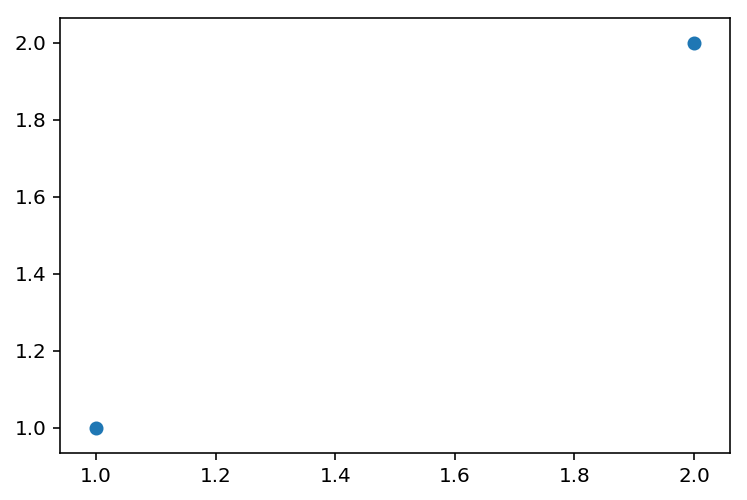

In [378]:
plt.scatter([1,2], [1,2])

True


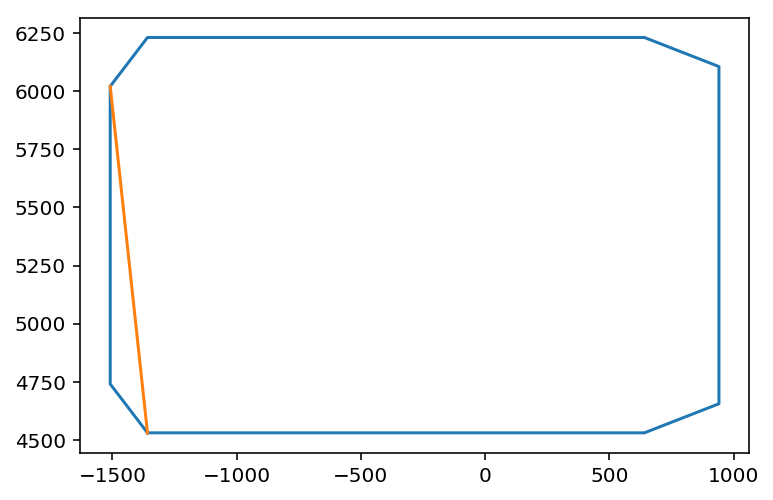

In [425]:
polygon = MyPolygon([(-1359, 4531), (-1509,4741), (-1509, 6021), (-1359, 6231), (641, 6231), (941, 6106), (941, 4656), (641, 4531), (-1359, 4531)])
line = LineString([(-1359, 4531), (-1509, 6021)])
print(line.within(polygon))
plt.plot(*polygon.exterior.coords.xy)
plt.plot(*line.coords.xy)

In [436]:
polygon = MyPolygon([(0,0), (1,0), (0,1)])
point = Point(0.1,0.1)
point.within(polygon)

True

GEOMETRYCOLLECTION (LINESTRING (0 0, 10 1))


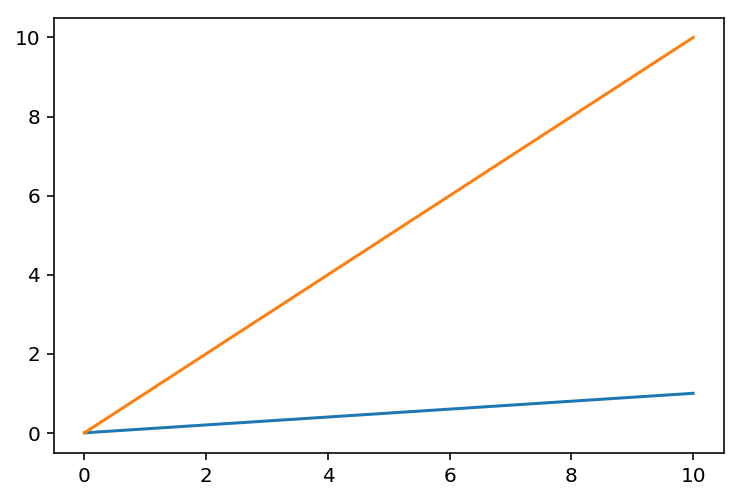

In [82]:
l1 = LineString([(11.366025403784441, 36.95448267190434), (31.366025403784434, 2.313466520526788)])
l2 = LineString([(11.366025403784441, 26.954482671904337), (31.366025403784434, -7.686533479473214)])

l1 = LineString([(-0.3660254037844357, 25.954482671904337), (19.63397459621556, -8.686533479473212)])
l2 = LineString([(-1.366025403784434, 27.686533479473212), (18.63397459621556, -6.954482671904335)])
l1 = LineString([(0, 0), (10, 1)])
l2 = LineString([(0, 0), (10, 10)])
plt.plot(*l1.coords.xy)
plt.plot(*l2.coords.xy)

point = l1.intersection(l2)

s= split(l1, point)
print(s)

LINESTRING (25 0, 25 25)
LINESTRING (25 26, 25 30)


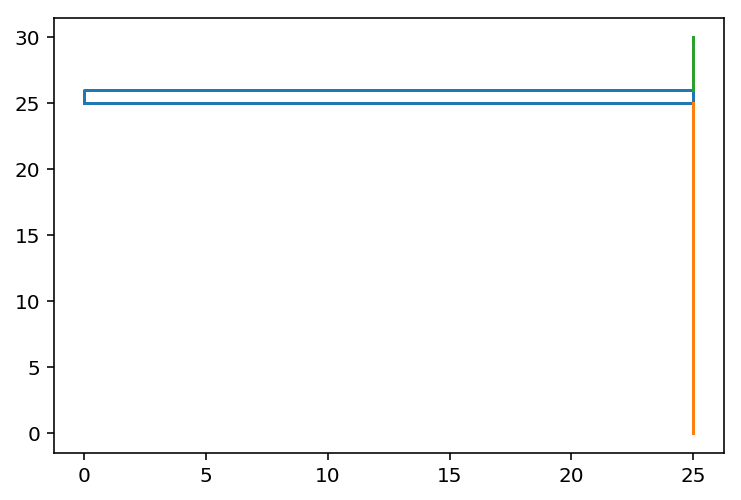

In [377]:
wall = MyPolygon([(0,25),(25,25),(25,26), (0,26)])
line = LineString([(25,0), (25,30)])

diff = line.difference(wall.buffer(-0.001))
diff = line.difference(wall)
#print(diff)
plt.plot(*wall.exterior.coords.xy)
#plt.plot(*line.coords.xy)
for mls in diff:
    print(mls)
    plt.plot(*mls.coords.xy)

In [186]:
import networkx as nx

graph = nx.Graph()

graph.add_edge(Vertex(0,0,0),Vertex(1,1,0))
graph.add_edge(Vertex(0,0,0),Vertex(1,2,0))
graph.add_edge(Vertex(0,0,0),Vertex(1,1,0))
graph.add_edge(Vertex(1,2,0),Vertex(1,1,0))

print(Vertex(0,0,0).__dict__)
n = graph.nodes()
e = graph.edges()

print(e)
print(n)

{'x': 0.0, 'y': 0.0, 'theta': 0.0, 'neighbors': []}
{'x': 0.0, 'y': 0.0, 'theta': 0.0, 'neighbors': []}
{'x': 0.0, 'y': 0.0, 'theta': 0.0, 'neighbors': []}
{'x': 1.0, 'y': 1.0, 'theta': 0.0, 'neighbors': []}
{'x': 1.0, 'y': 1.0, 'theta': 0.0, 'neighbors': []}
{'x': 1.0, 'y': 1.0, 'theta': 0.0, 'neighbors': []}
{'x': 0.0, 'y': 0.0, 'theta': 0.0, 'neighbors': []}


KeyError: 0.0 0.0 0.0

In [114]:
lista = [1,2,3,4,5,6]

for i,a in enumerate(lista):
    if a == 2:
        lista.pop(i)
        lista[i:i] = [21,22, 23]
    if a == 22:
        print("FOUND")
        
    print(i,a)
print(lista)

0 1
1 2
FOUND
2 22
3 23
4 3
5 4
6 5
7 6
[1, 21, 22, 23, 3, 4, 5, 6]


In [71]:
from collections import OrderedDict

od = OrderedDict({0: 1, 1: 10})

for i, s in enumerate(od):
        current = od[s]
        
        od[s] += 1

    
print(i, od[s])

1 11


In [74]:
a = [1,2,3]
a.clear()

# Round Robot

831.0385069297331


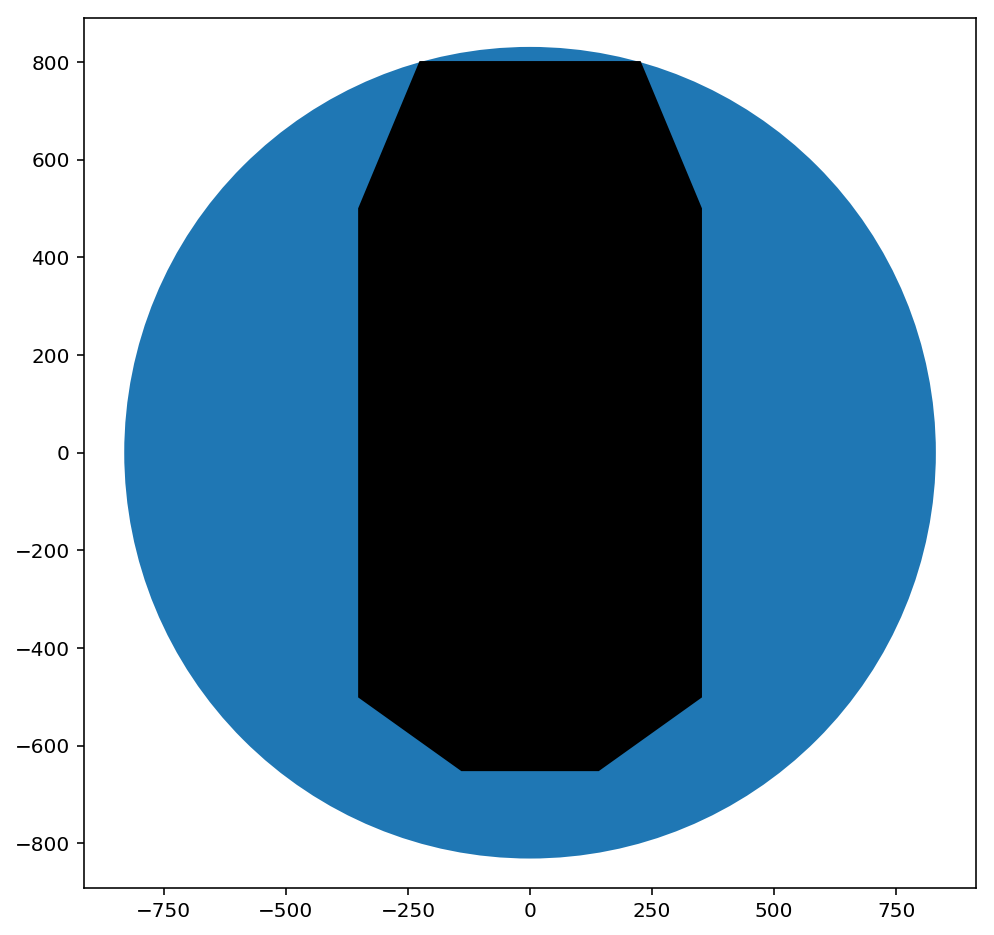

In [55]:
from matplotlib.animation import FuncAnimation

inc = 8
#angles = np.linspace(0,2*np.pi, inc)
angles = [0]
#angles = np.append(angles[:-1], [0])

robot = MyPolygon([(-140, -650), (140,-650), (350,-500), (350,500), \
         (225,800), (-225,800), (-350,500), (-350,-500)]) #.rotate(-math.pi/2)

max_dist = 0
for line in robot.exterior.coords:
    cur_dist = Point(0,0).distance(Point(*line))
    if max_dist < cur_dist:
        max_dist = cur_dist
print(max_dist)

fig, ax = plt.subplots(figsize=(8, 8))

ax.axis('equal')
circle = plt.Circle((0,0),max_dist)
circle1 = plt.Circle((0,0),10)
ax.add_patch(circle)
for i, theta in enumerate(angles):
    ax.fill(*robot.rotate(theta).exterior.coords.xy, color=(i*1/inc,i*1/inc,i*1/inc))
    plt.savefig('proto_fig_{}.png'.format(i), format='png')
    
ax.scatter(0,0, s=1000, c='r')

(-499.5537634408602, 499.5537634408603, -842.1826710816777, 992.1826710816777)

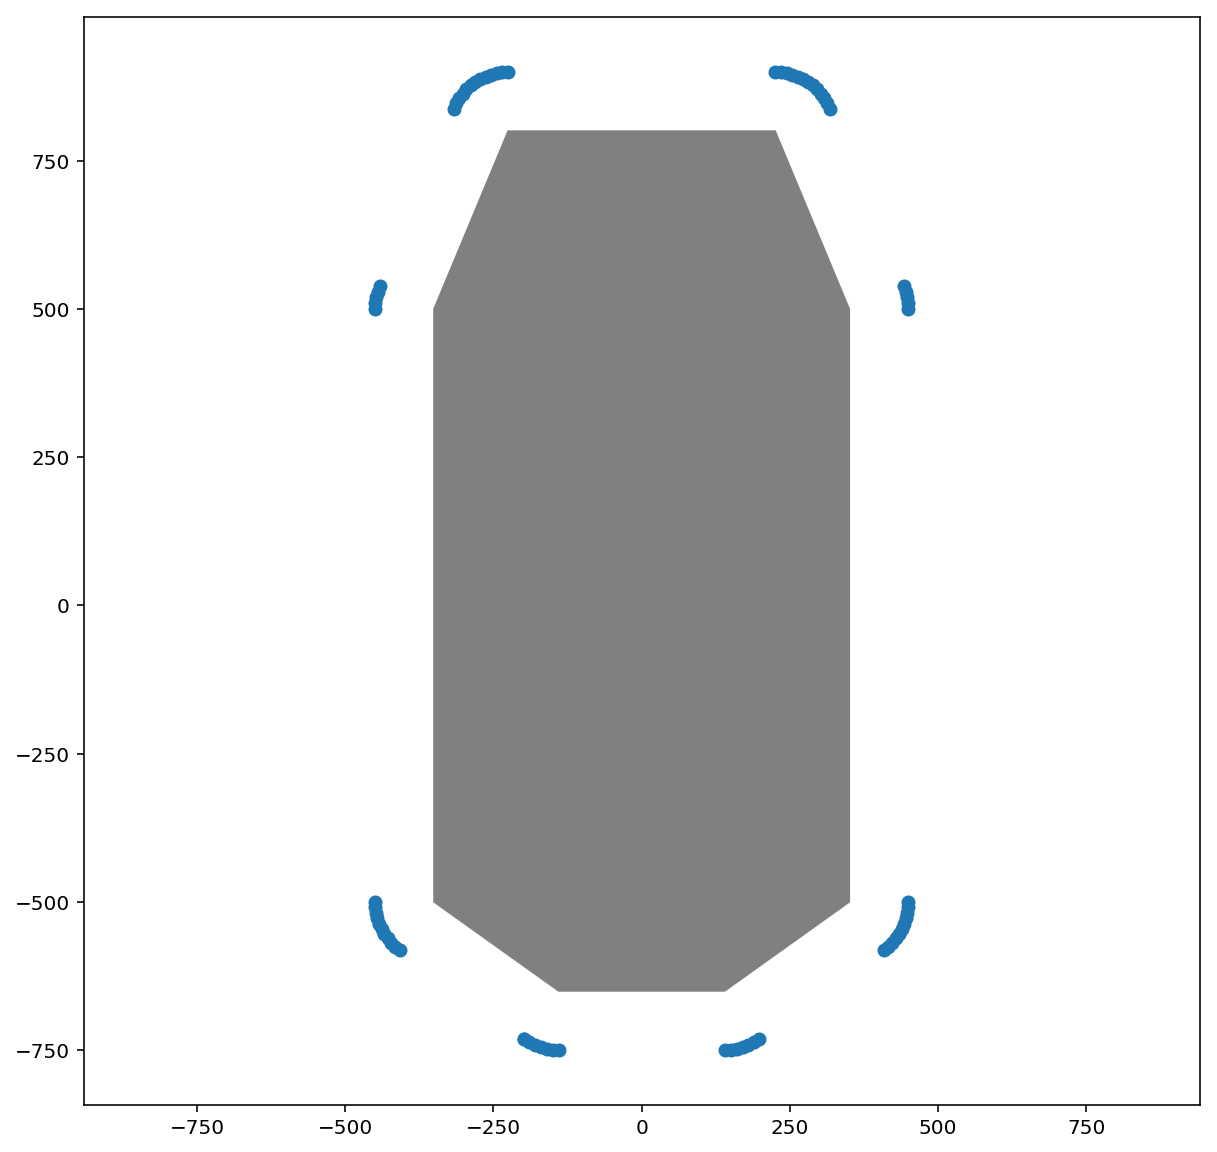

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.fill(*robot.exterior.coords.xy, color=(0.5, 0.5, 0.5))
plt.scatter(*robot.buffer(100).exterior.coords.xy)
plt.axis('equal')

# Circular C-space

In [4]:
import time

from shapely.ops import unary_union
import networkx as nx
from networkx.generators.lattice import triangular_lattice_graph, hexagonal_lattice_graph

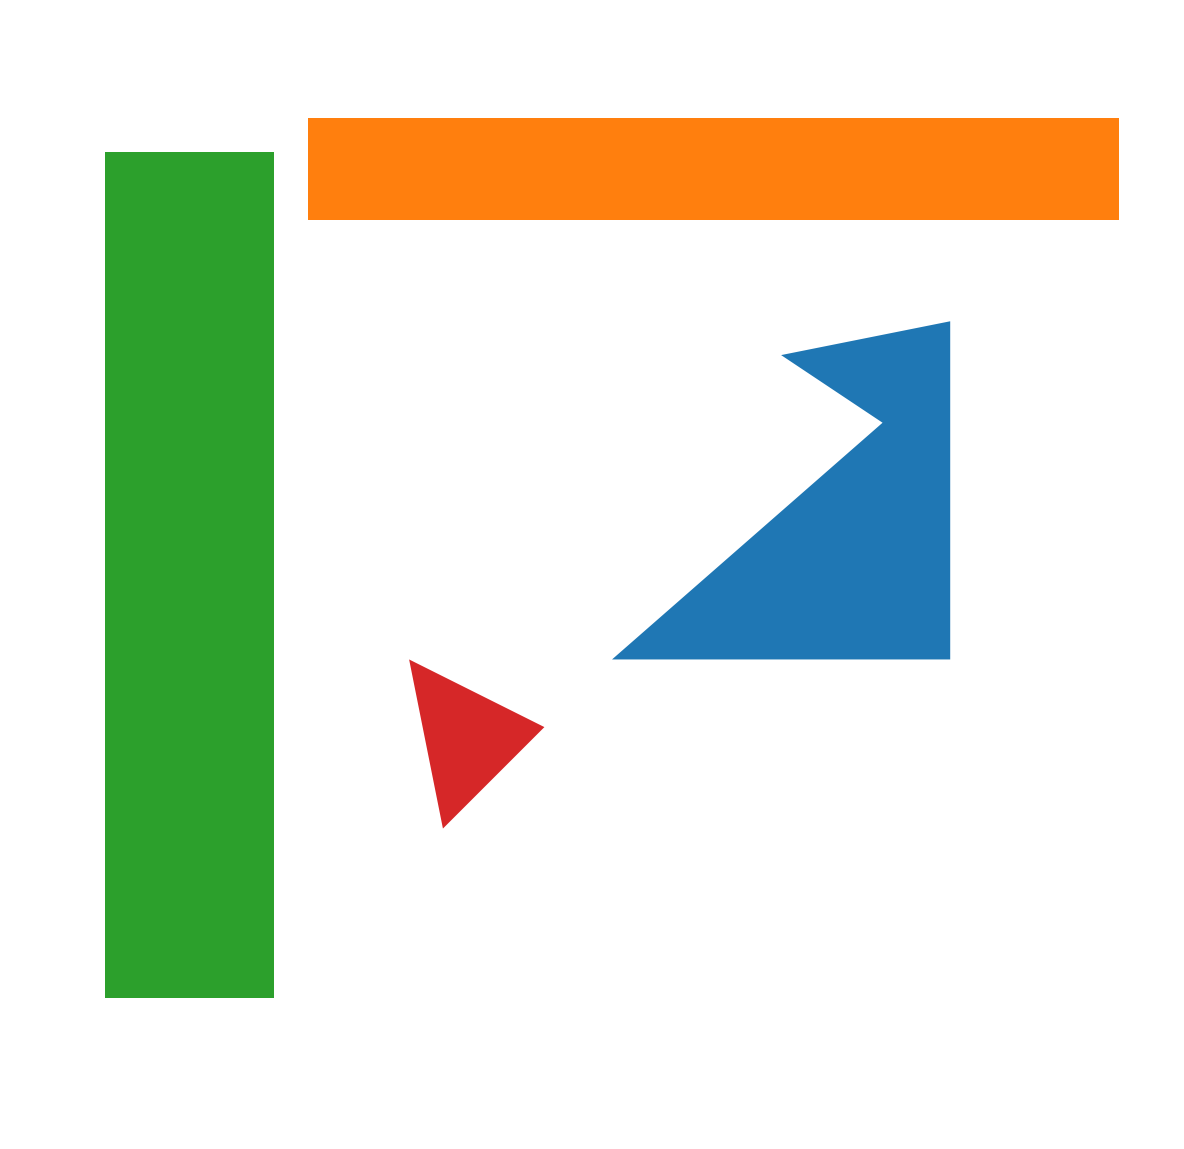

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))

obstacle1 = MyPolygon([(10,10),(20,10), (20,20), (15,19), (18,17)])
obstacle2 = MyPolygon([(5,5),(4,10),(8,8)])
wall1 = MyPolygon([(1,23),(25,23),(25,26), (1,26)])
wall2 = MyPolygon([(0,0),(0,25),(-5,25), (-5,0)])
obstacles = [obstacle1, wall1, wall2, obstacle2]

for obstacle in obstacles:
    plt.fill(*obstacle.exterior.coords.xy)

plt.axis('off')
plt.axis('equal')

plt.savefig('polygons_work.png', format='png', bbox_inches='tight')

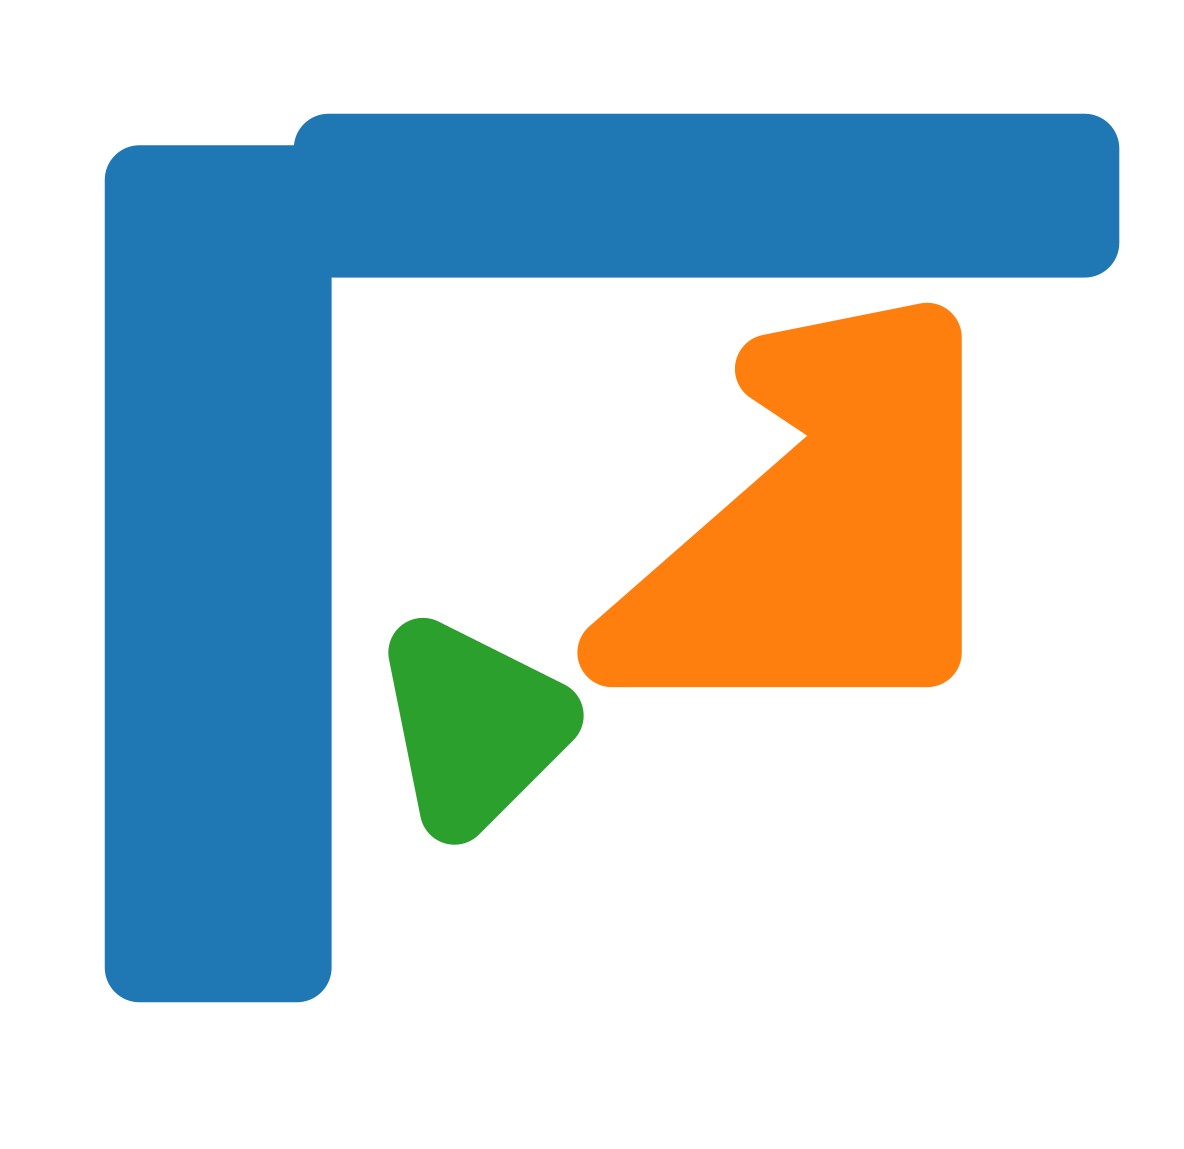

In [219]:
fig, ax = plt.subplots(figsize=(10, 10))

uobstacles = unary_union(obstacles).buffer(1.1)

for obstacle in uobstacles:
    plt.fill(*obstacle.exterior.coords.xy)

plt.axis('off')
plt.axis('equal')

plt.savefig('polygons_cspace.png', format='png', bbox_inches='tight')

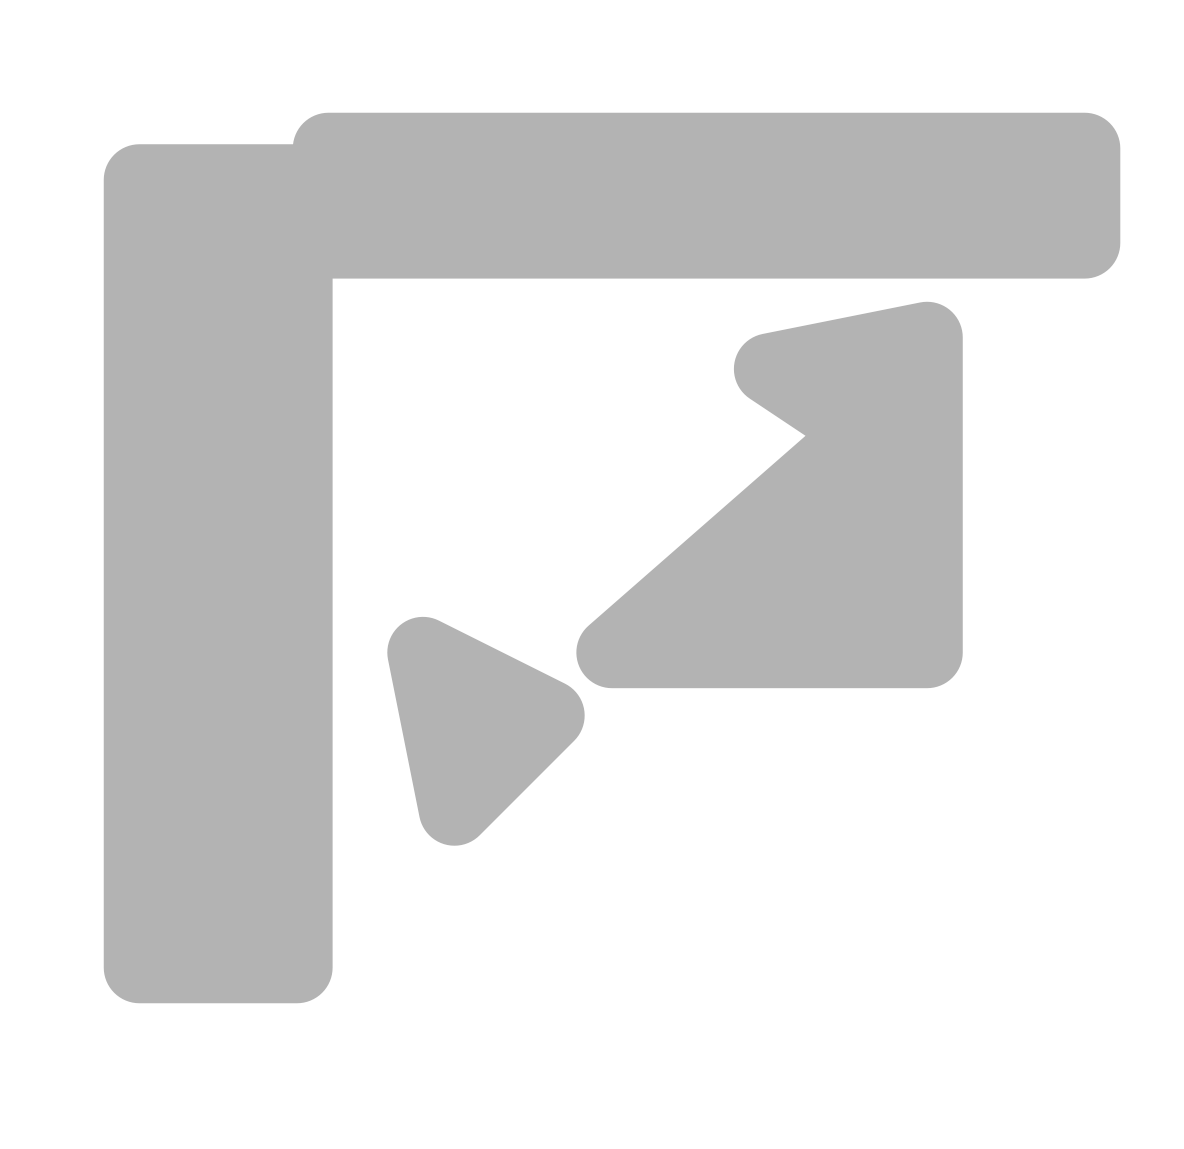

In [286]:
fig, ax = plt.subplots(figsize=(10, 10))

uobstacles = unary_union(obstacles).buffer(1.1)

for obstacle in uobstacles:
    plt.fill(*obstacle.exterior.coords.xy, color=(0.7, 0.7,0.7))

plt.axis('off')
plt.axis('equal')

plt.savefig('polygons_cspace_grey.png', format='png', bbox_inches='tight')

In [741]:
x,y = uobstacles.envelope.exterior.xy

print(min(x), max(x), min(y), max(y))

-6.0 26.0 -1.0 27.0


elapsed: 0.0989222526550293


(2.3974804786645754,
 37.63319668639518,
 -1.4301612389825866,
 29.431174037067482)

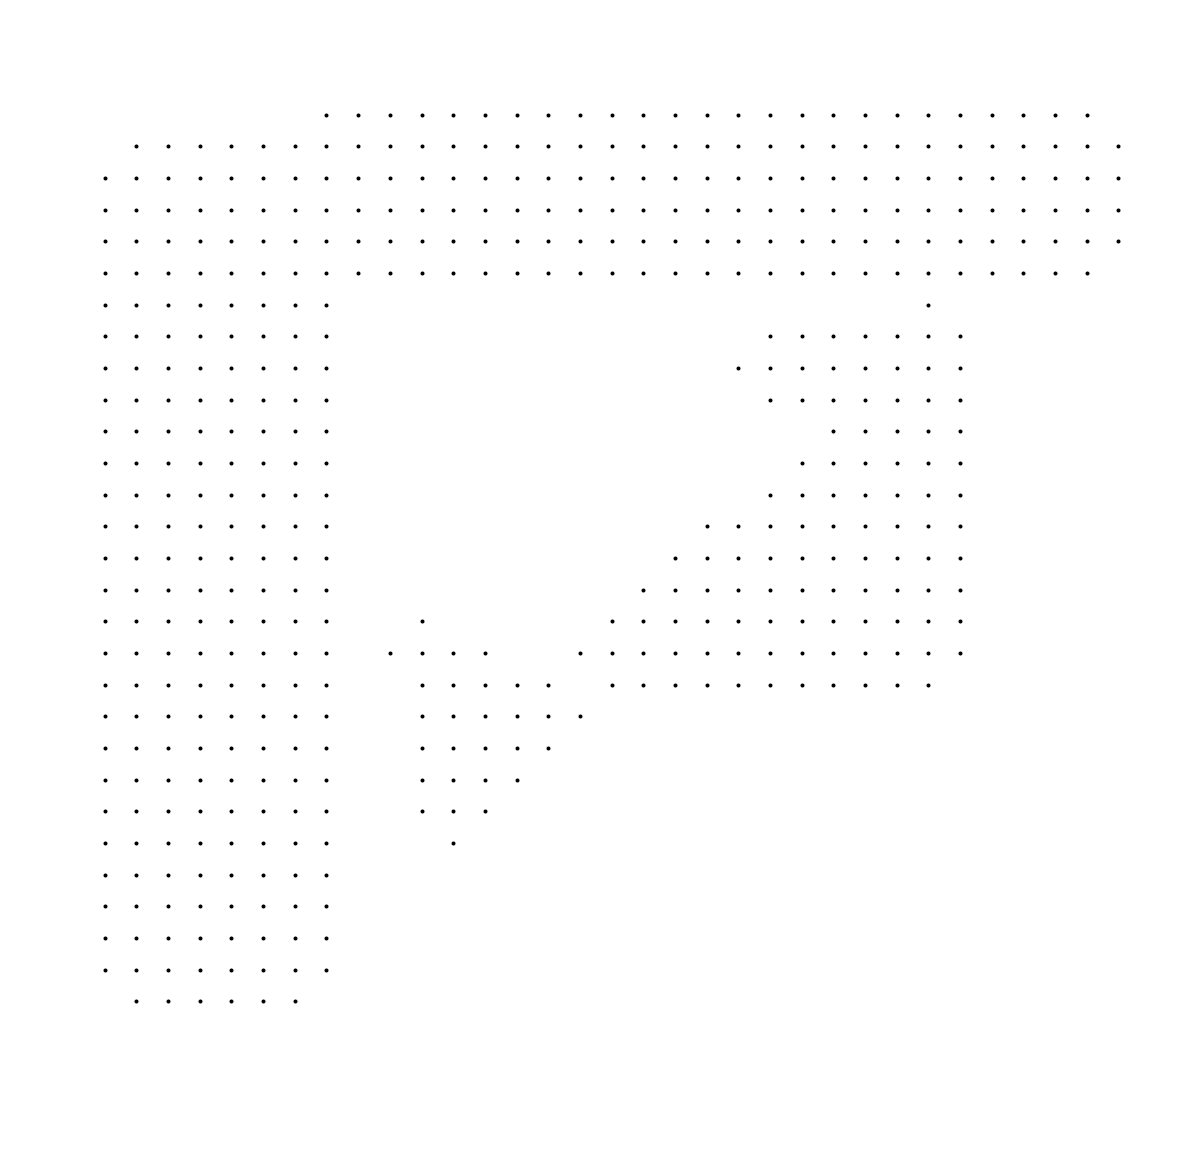

In [220]:
fig, ax = plt.subplots(figsize=(10, 10))
points = []
tstart = time.time()
for x in range(-10, 30):
    for y in range(-1, 28):
        p = Point(x,y)
        if p.within(uobstacles) or p.touches(uobstacles):
            xt, yt = p.coords.xy

            points.append((int(xt[0])+10,int(yt[0])+1))
            
tend = time.time()
print("elapsed: {}".format(tend-tstart))

for p in points:
    plt.scatter(*p, s=1, color='k')

plt.axis('off')
plt.axis('equal')



In [221]:
G = nx.grid_2d_graph(42,32)
pos = dict((n, n) for n in G.nodes())
G.remove_nodes_from(points)

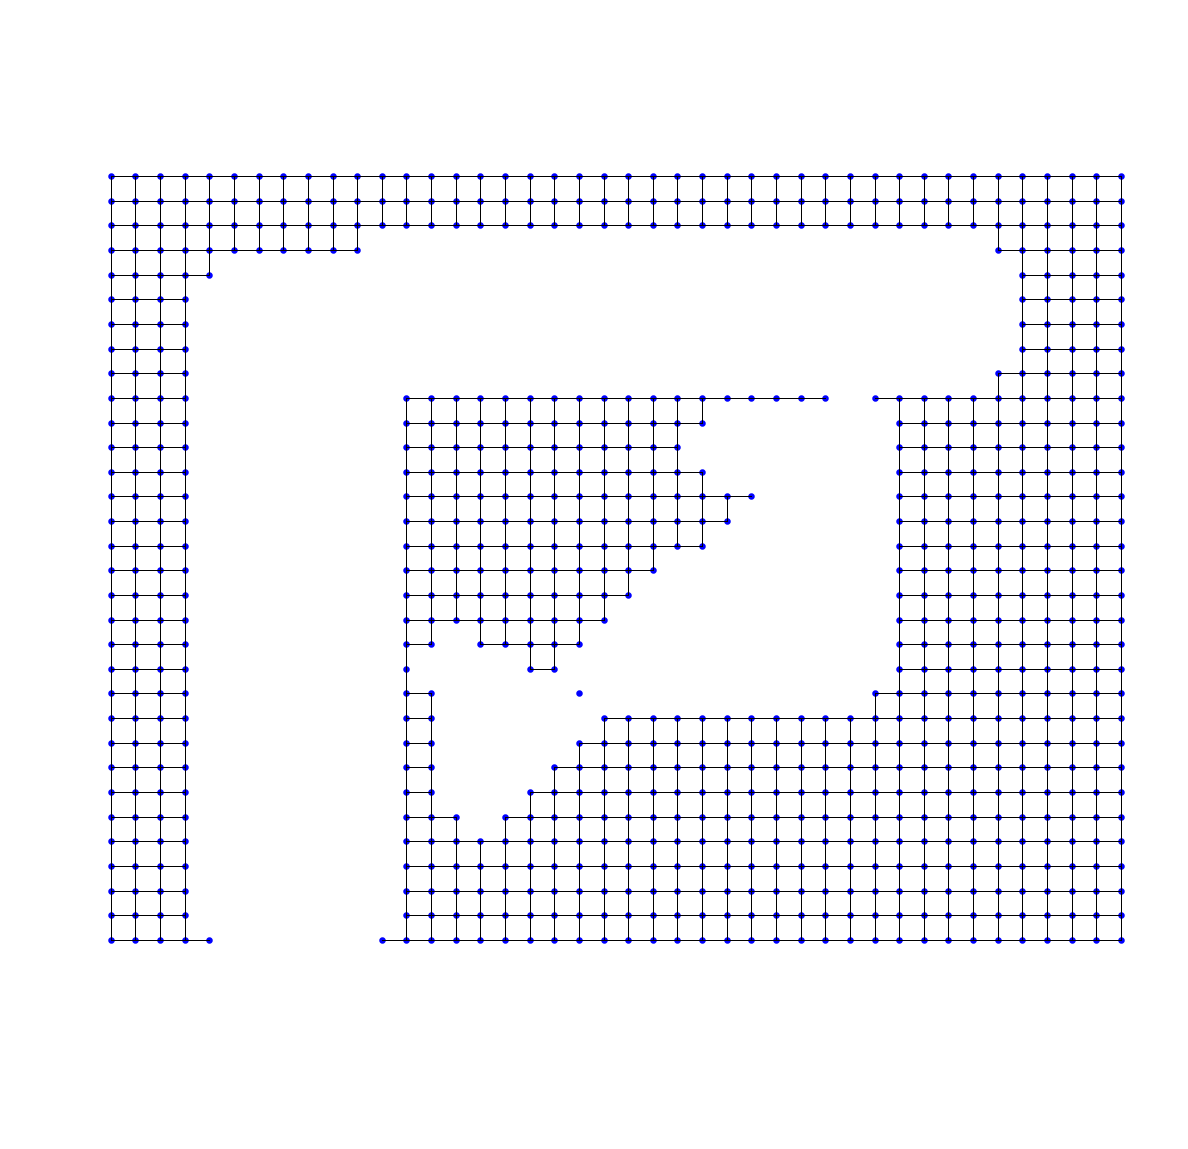

In [222]:
fig, ax = plt.subplots(figsize=(10, 10))
#nx.draw_networkx(G, pos=pos, labels=None,node_size=10)

for edge in G.edges():
    (x1, y1),(x2,y2) = edge
    plt.plot([x1, x2], [y1, y2], lineWidth=0.5, color='k')

for node in G.nodes():
    plt.scatter(*node, s=5, color='b')
    

    
plt.axis('off')
plt.axis('equal')

plt.savefig('cspace_grid.png', bbox_inches='tight')

In [223]:
start = (5, 30)
destination = (13,20)

path = nx.astar_path(G, start, destination)

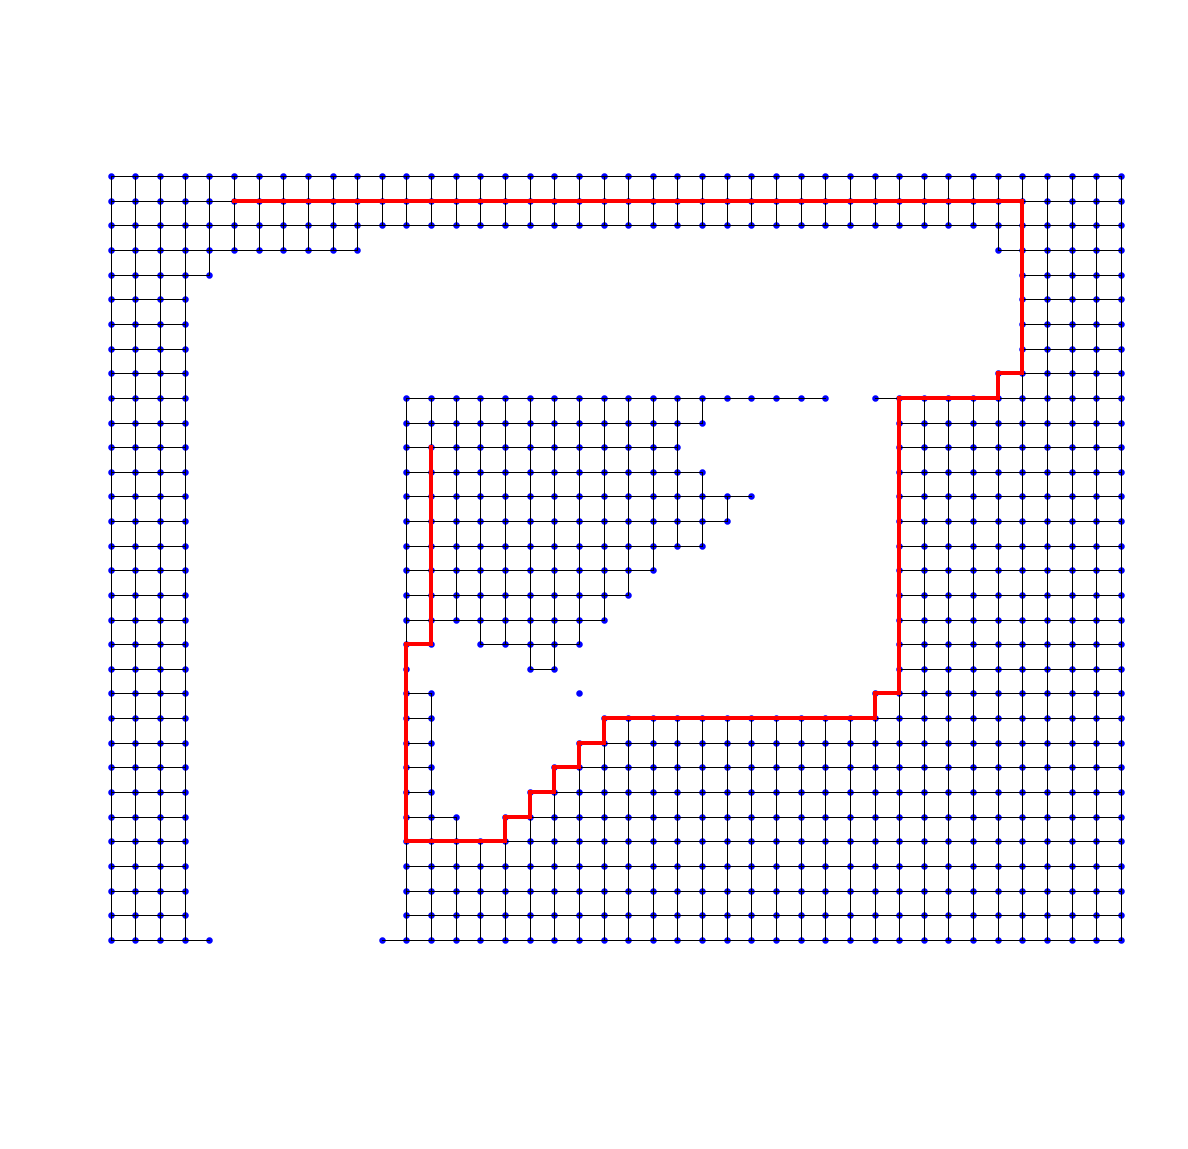

In [224]:
fig, ax = plt.subplots(figsize=(10, 10))


for edge in G.edges():
    (x1, y1),(x2,y2) = edge
    plt.plot([x1, x2], [y1, y2], lineWidth=0.5, color='k')
for node in G.nodes():
    plt.scatter(*node, s=5, color='b')
    

    
for p in path:
    plt.plot(*zip(*path), color='r', lineWidth=2)


plt.axis('off')
plt.axis('equal')

    
plt.savefig('cspace_path.png', bbox_inches='tight')

In [732]:
G = triangular_lattice_graph(5,5, with_positions=True)
G.remove_nodes_from([(0,0), (1,3)])

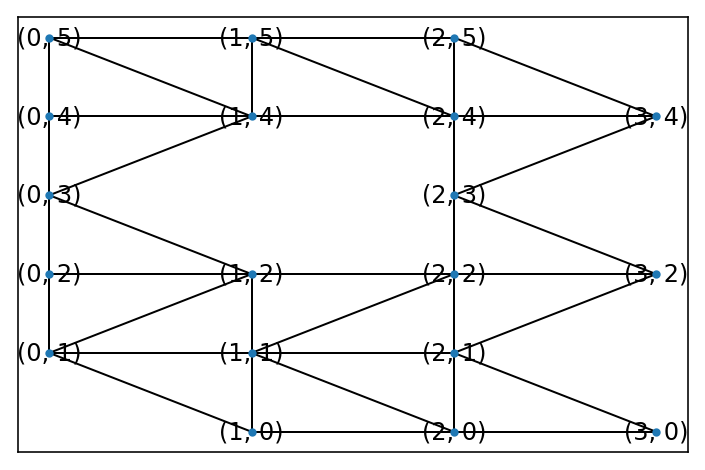

In [733]:
nx.draw_networkx(G, pos=pos, labels=None,node_size=10)

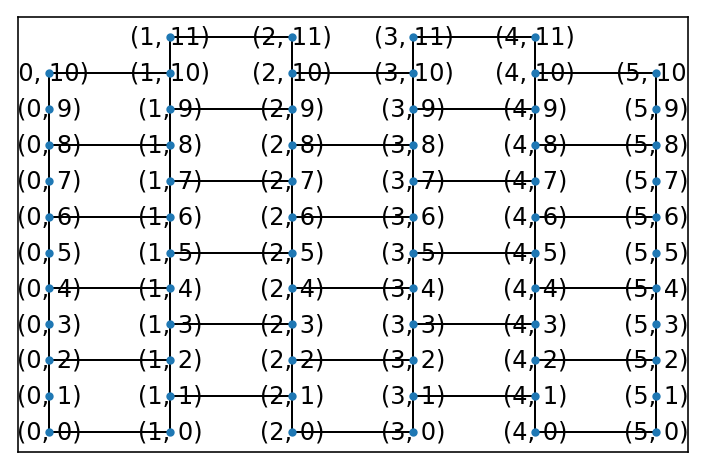

In [734]:
G = hexagonal_lattice_graph(5,5, with_positions=True)
nx.draw_networkx(G, pos=pos, labels=None,node_size=10)

In [135]:
x_range = 11270 - (-3100)
y_range = 8720 - (-3820)

print(x_range/20* y_range/20)

#G = nx.grid_2d_graph(x_range,y_range)

450499.5


In [25]:
import networkx as nx
import sys

G = nx.grid_2d_graph(100,100)


32

In [138]:
o = Polygon([(1,1), (2,1), (2,2)])

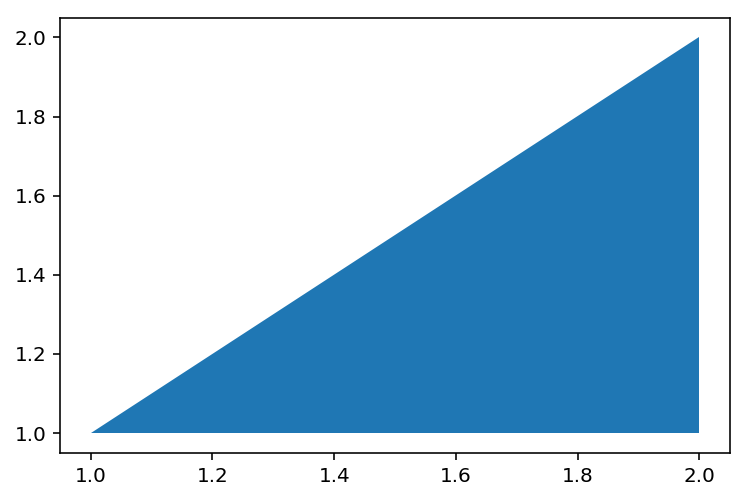

In [141]:
plt.fill(*o.exterior.coords.xy)

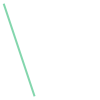

In [140]:
LineString([(1,2),(2,-1)])

LINESTRING (17.01754385964912 16.14035087719298, 20 15.71428571428571)
GEOMETRYCOLLECTION EMPTY
LINESTRING (-5 19.28571428571428, 0 18.57142857142857)
GEOMETRYCOLLECTION EMPTY


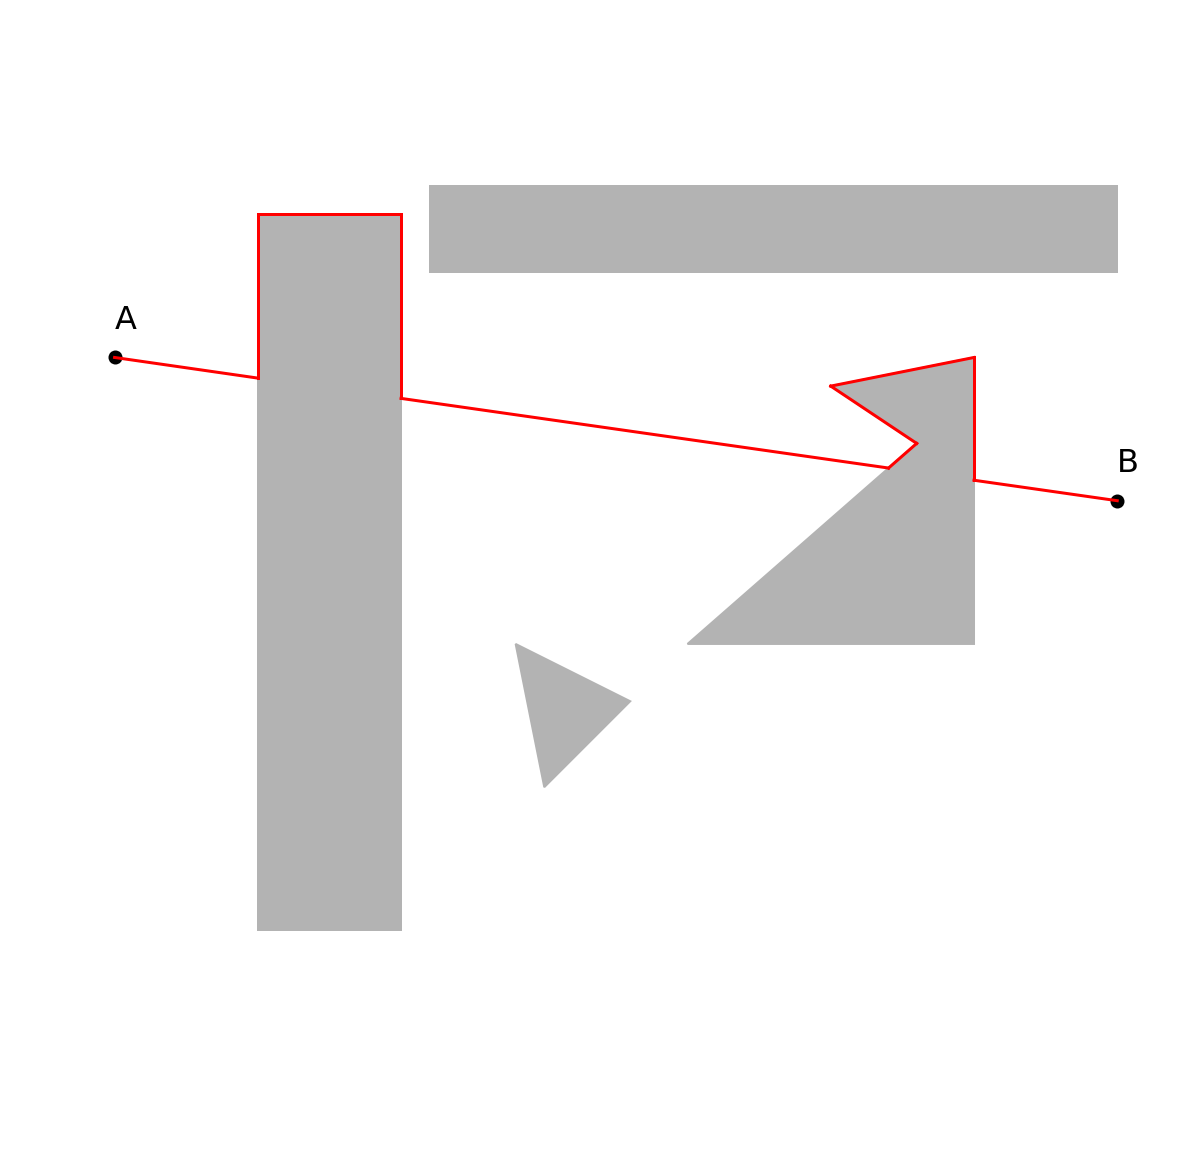

In [310]:
fig, ax = plt.subplots(figsize=(10, 10))

line = LineString([(-10, 20), (25,15)])

#(15,19), (18,17)(20,10), (20,20),

ls = [LineString([(-10, 20),(-5, 19.28)]), LineString([(0, 18.57142857142857), (17.01754385964912, 16.14035087719298)]),
      LineString([(20, 15.71428571428571), (25,15)]), LineString([(-5, 19.28), (-5, 25)]), 
      LineString([(-5, 25), (0,25)]), 
      LineString([(0,25), (0, 18.57)]),
      LineString([(17.01754385964912, 16.14035087719298), (18,17)]),
      LineString([(18,17), (15,19)]),
      LineString([(15,19), (20,20)]),
      LineString([(20,20), (20, 15.71428571428571)]),
     ]

for l in ls:
    plt.plot(*l.coords.xy, color='r')

for obstacle in obstacles:
    pint = obstacle.intersection(line)
    print(pint)
    plt.fill(*obstacle.exterior.coords.xy, color=(0.7, 0.7, 0.7))
    
plt.scatter(*line.coords.xy, color='k')

string = ["A", "B"]

for i, coord in enumerate(line.coords):
    x, y = coord
    plt.text(x,y+1 , string[i], fontsize=16)
plt.axis('off')
plt.axis('equal')

plt.savefig('polygons_bug2.svg', format='svg', bbox_inches='tight')

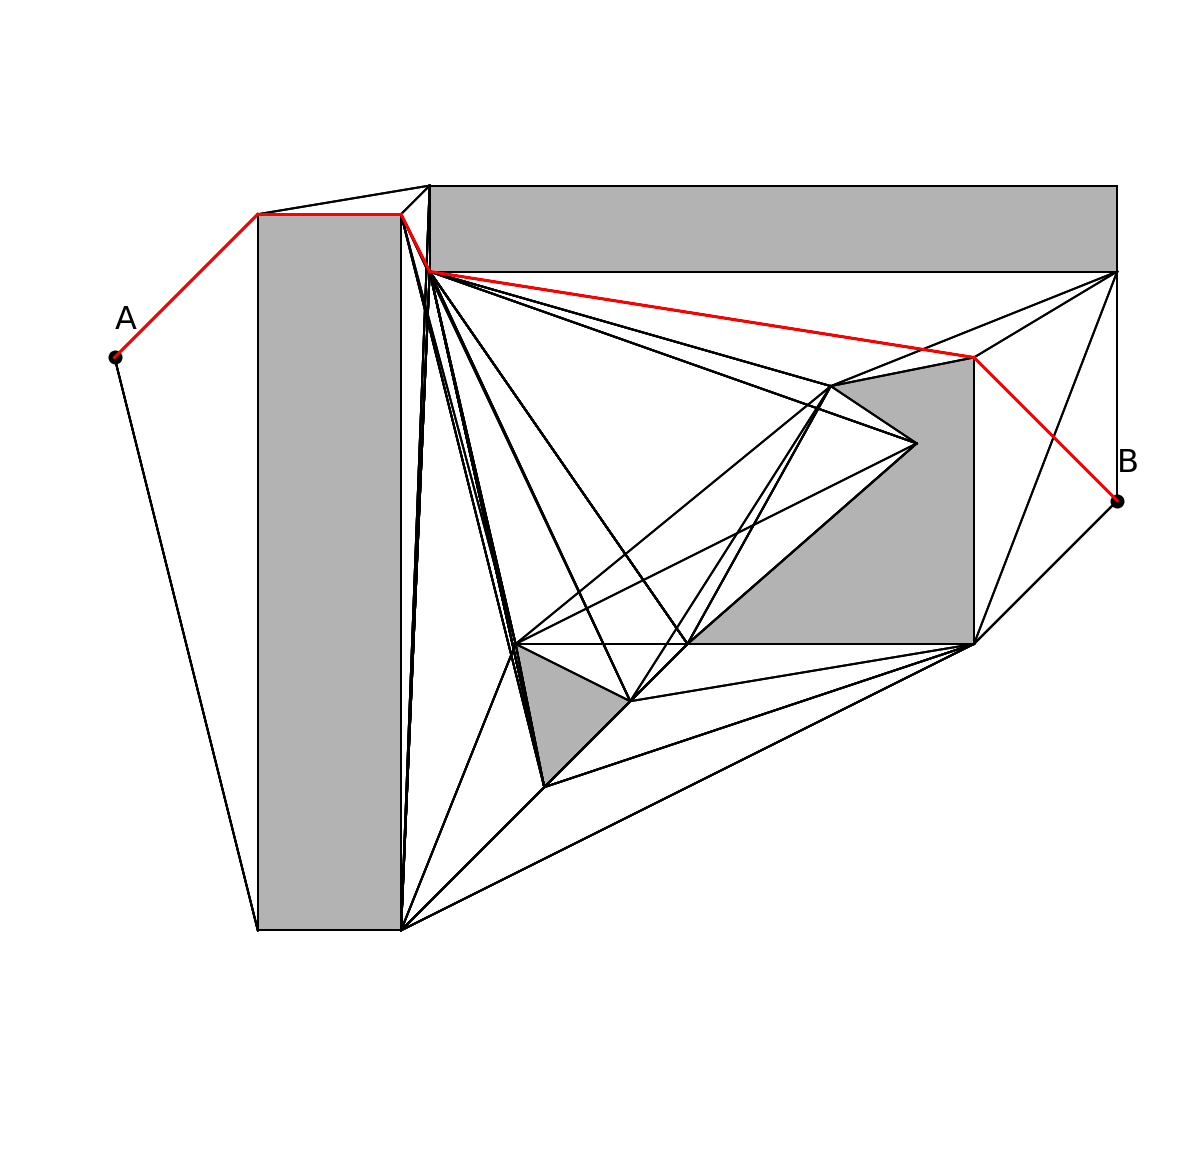

In [97]:
G = nx.Graph()

fig, ax = plt.subplots(figsize=(10, 10))

start = Point(-10, 20)
dest = Point(25,15)

vstart = Vertex(*tuple(*start.coords), 0)
vdest = Vertex(*tuple(*dest.coords), 0)

linex = LineString([start, dest])

vertexes = []

for obstacle in obstacles:
    for v1 in obstacle.exterior.coords:
        for obstacle in obstacles:
            for v2 in list(obstacle.exterior.coords) + [(*start.coords), (*dest.coords)]:
                line = LineString([v1, v2])
                
                yes = True
                for obstacle in obstacles:
                    if line.within(obstacle) or line.crosses(obstacle):
                        yes=False
                    
                if yes:
                    vx1 = Vertex(*v1,0)
                    vx2 = Vertex(*v2,0)
                    G.add_edge(vx1, vx2, weight=vx1.weight(vx2))
                    plt.plot(*line.coords.xy, color='k', lineWidth=1)

path = nx.astar_path(G, vstart, vdest)

last = None
for p in path:

    if isinstance(last, Vertex):
        plt.plot([last.x, p.x], [last.y, p.y], color='r')
    
    last = p
                    
for obstacle in obstacles:
    plt.fill(*obstacle.exterior.coords.xy, color=(0.7, 0.7, 0.7))
    
plt.scatter(*linex.coords.xy, color='k')

string = ["A", "B"]

for i, coord in enumerate(linex.coords):
    x, y = coord
    plt.text(x,y+1 , string[i], fontsize=16)
plt.axis('off')
plt.axis('equal')

plt.savefig('polygons_sight4.svg', format='svg', bbox_inches='tight')

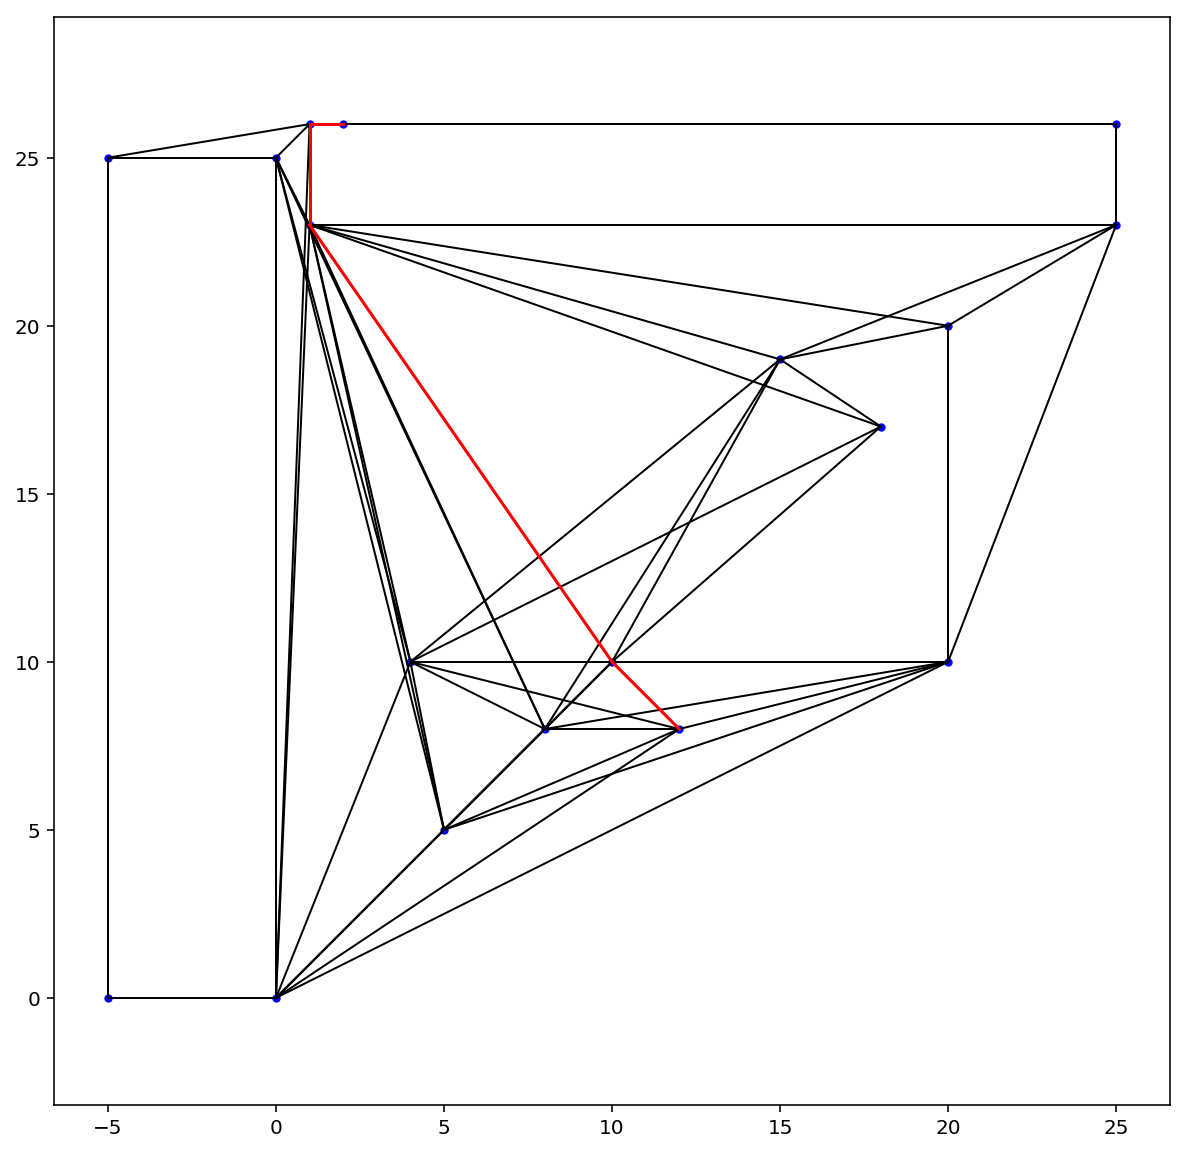

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))


for edge in G.edges():
    v1, v2 = edge
    plt.plot([v1.x, v2.x], [v1.y, v2.y], lineWidth=1, color='k')
for node in G.nodes():
    plt.scatter(node.x, node.y, s=10, color='b')
    
last = None
for p in path:

    if isinstance(last, Vertex):
        plt.plot([last.x, p.x], [last.y, p.y], color='r')
    
    last = p
    
plt.axis('equal')

plt.savefig('polygons_sight3.svg', format='svg', bbox_inches='tight')

In [357]:
print(path)

[-10.0 20.0 0.0, -5.0 25.0 0.0, 1.0 26.0 0.0, 25.0 26.0 0.0, 25.0 15.0 0.0]


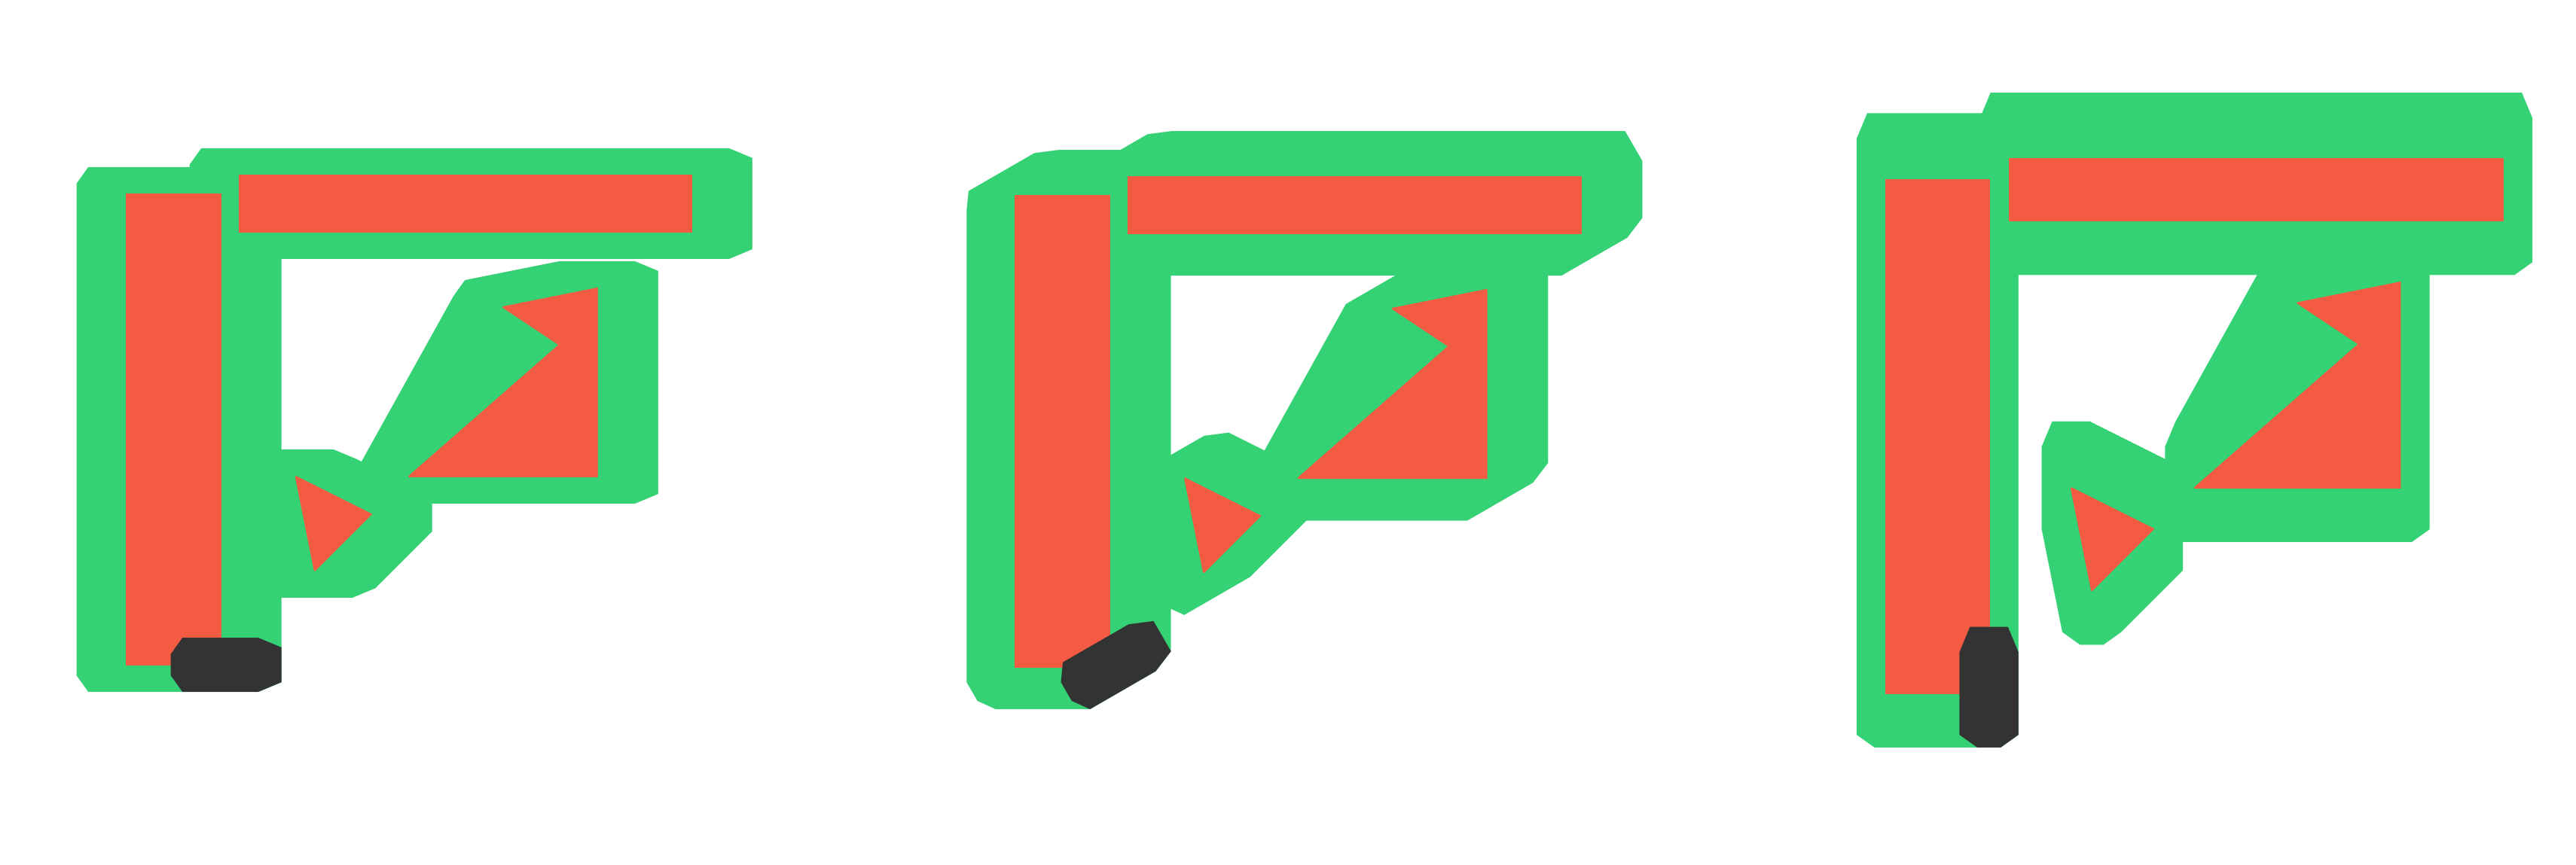

In [283]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30, 10))


exterior = []
for x,y in robot.exterior.coords:
    exterior.append((x/250,y/250))

robot2 = MyPolygon(exterior).rotate(math.pi*3/2)

for obstacle in obstacles:
    ax1.fill(*(obstacle+robot2).convex_hull.exterior.coords.xy, color=(52/256, 211/256, 116/256))

for obstacle in obstacles:
    ax1.fill(*obstacle.exterior.coords.xy, color=(244/256, 92/256, 66/256))



ax1.fill(*robot2.exterior.coords.xy, color=(0.2, 0.2, 0.2))
    
ax1.axis('equal')

###########################

robot3 = MyPolygon(exterior).rotate(-math.pi/3)

for obstacle in obstacles:
    ax2.fill(*(obstacle+robot3).convex_hull.exterior.coords.xy, color=(52/256, 211/256, 116/256))

for obstacle in obstacles:
    ax2.fill(*obstacle.exterior.coords.xy, color=(244/256, 92/256, 66/256))



ax2.fill(*robot3.exterior.coords.xy, color=(0.2, 0.2, 0.2))
    
ax2.axis('equal')

##########################

robot4 = MyPolygon(exterior).rotate(2*math.pi)

for obstacle in obstacles:
    ax3.fill(*(obstacle+robot4).convex_hull.exterior.coords.xy, color=(52/256, 211/256, 116/256))

for obstacle in obstacles:
    ax3.fill(*obstacle.exterior.coords.xy, color=(244/256, 92/256, 66/256))



ax3.fill(*robot4.exterior.coords.xy, color=(0.2, 0.2, 0.2))
    
ax3.axis('equal')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.savefig('cspace_subplot.svg', format='svg', bbox_inches='tight')

In [341]:
G = nx.Graph()


NodeView((1, 2))

KeyError: 0

In [342]:
v1 = Vertex(1,1,0)
v2 = Vertex(2,2,0)

G.add_edge(v1, v2,attr_dict={'weight': v1.weight(v2)})

In [343]:
G.nodes()

NodeView((1.0 1.0 0.0, 2.0 2.0 0.0))

In [40]:
G = nx.Graph()

for x in range(10):
    for y in range(10):
        
        
        v1 = Vertex(x,y,0)
        v2 = Vertex(x-1,y,0)
        


        G.add_edge(v1, v2,attr_dict={'weight': v1.weight(v2)})
        
        v1 = Vertex(x,y,0)
        v2 = Vertex(x,y-1,0)

        G.add_edge(v1, v2,attr_dict={'weight': v1.weight(v2)})
        v1 = Vertex(x,y,0)
        v2 = Vertex(x-1,y-1,0)
        
        G.add_edge(v1, v2,attr_dict={'weight': v1.weight(v2)})
        
path = nx.astar_path(G, Vertex(0,0,0), Vertex(5,8,0))

In [32]:
G = nx.Graph()

G.add_edge(Vertex(0,0,0), Vertex(0,1,0),attr_dict={'weight': v1.weight(v2)})
G.add_edge(Vertex(0,0,0), Vertex(0,2,0),attr_dict={'weight': v1.weight(v2)})
G.add_edge(Vertex(0,0,0), Vertex(0,3,0),attr_dict={'weight': v1.weight(v2)})
G.add_edge(Vertex(0,0,0), Vertex(0,4,0),attr_dict={'weight': v1.weight(v2)})
G.add_edge(Vertex(0,0,0), Vertex(0,4,0),attr_dict={'weight': v1.weight(v2)})

[0.0 0.0 0.0,
 0.0 1.0 0.0,
 0.0 2.0 0.0,
 0.0 3.0 0.0,
 0.0 4.0 0.0,
 0.0 5.0 0.0,
 0.0 6.0 0.0,
 0.0 7.0 0.0,
 0.0 8.0 0.0,
 0.0 9.0 0.0,
 1.0 9.0 0.0,
 2.0 9.0 0.0,
 3.0 9.0 0.0,
 4.0 9.0 0.0,
 5.0 9.0 0.0]

(-1.5343984345218202,
 9.534496196177745,
 -1.5354212525074846,
 9.535421252507486)

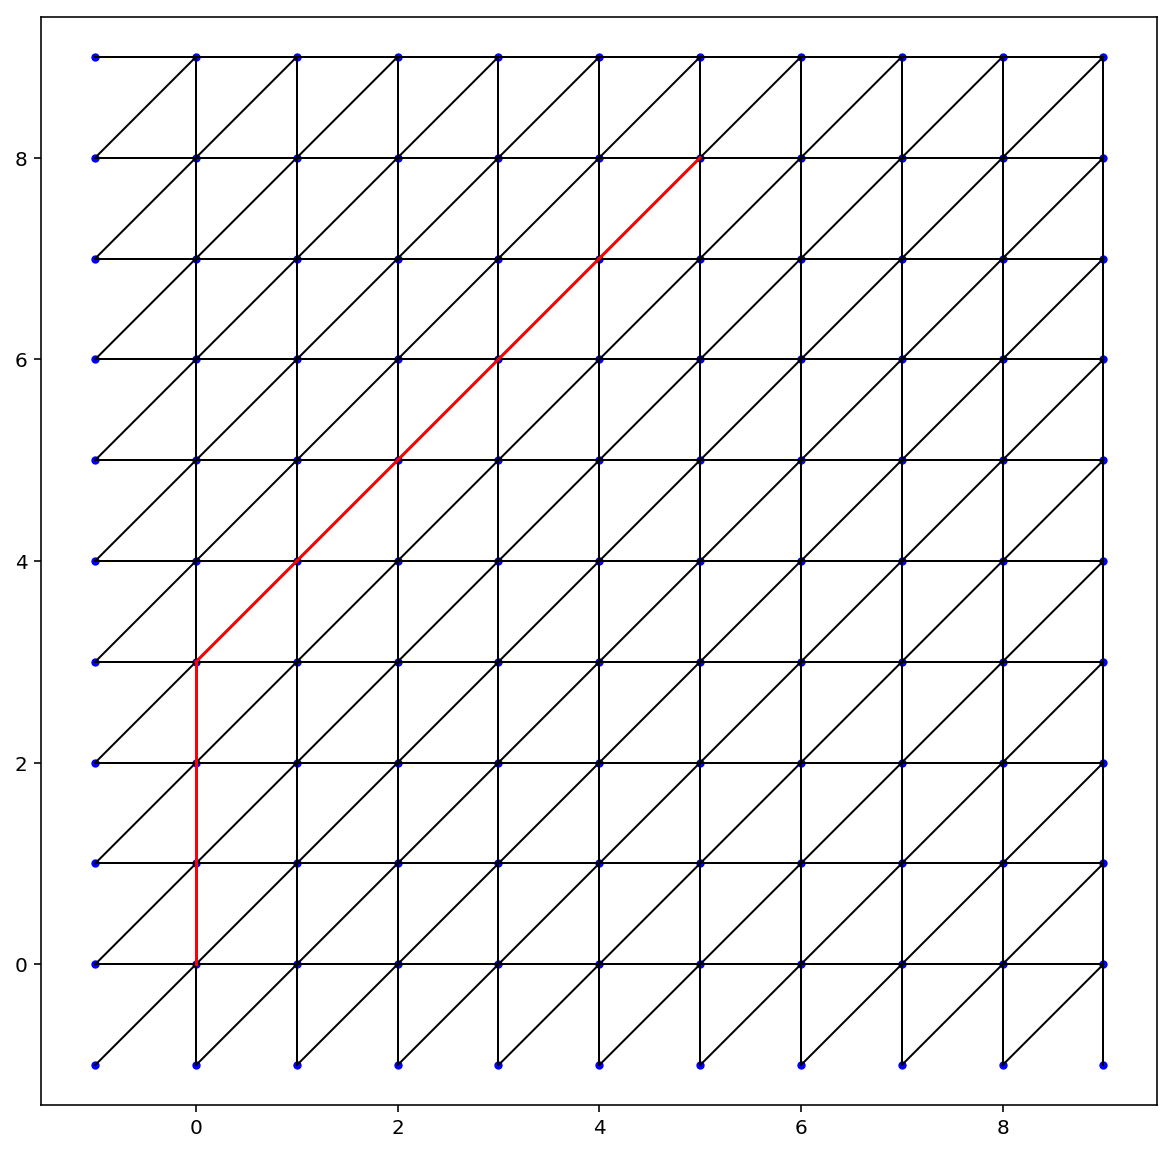

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))


for edge in G.edges():
    v1, v2 = edge
    plt.plot([v1.x, v2.x], [v1.y, v2.y], lineWidth=1, color='k')
for node in G.nodes():
    plt.scatter(node.x, node.y, s=10, color='b')
    
last = None
for p in path:

    if isinstance(last, Vertex):
        plt.plot([last.x, p.x], [last.y, p.y], color='r')
    
    last = p
    
plt.axis('equal')